In [0]:
%matplotlib inline
!pip3 install spacy
!pip3 install -U scikit-learn
!pip3 install seaborn

In [0]:
import numpy as np
import pandas as pd

In [0]:
train = pd.read_json('./cyberTrolls.json', lines = True)

In [0]:
def clean_text(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

In [0]:
len(train)

20001

In [0]:
train1.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


First of all, after looking at all of extras, its all NaN, does not add any value and therefor will be removed

In [0]:
len(train) - train.extras.isnull().count()

0

In [0]:
train.drop(['extras'], axis=1, inplace=True)

In [0]:
train.head()

,content,annotation
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}"
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}"
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}"
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}"
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}"


In [0]:
train.annotation.head()

0    {'notes': '', 'label': ['1']}
1    {'notes': '', 'label': ['1']}
2    {'notes': '', 'label': ['1']}
3    {'notes': '', 'label': ['1']}
4    {'notes': '', 'label': ['1']}
Name: annotation, dtype: object

In [0]:
def right(value, count):
    # To get right part of string, use negative first index in slice.
    return value[-count:]

# Test the method.
source = "soft orange cat"
print(right(source, 3))
print(right(source, 1))

cat
t


In [0]:
%%time
strs = []
for i in range(len(train.annotation)):
    strs.append(str(train.annotation[i]))
    

CPU times: user 443 ms, sys: 2.24 ms, total: 446 ms
Wall time: 445 ms


In [0]:
strs[:5]

["{'notes': '', 'label': ['1']}",
 "{'notes': '', 'label': ['1']}",
 "{'notes': '', 'label': ['1']}",
 "{'notes': '', 'label': ['1']}",
 "{'notes': '', 'label': ['1']}"]

In [0]:
strs[0][-4]

'1'

In [0]:
%%time
results = []
for i in range(len(strs)):
    results.append(strs[i][-4])

CPU times: user 3.86 ms, sys: 43 µs, total: 3.9 ms
Wall time: 3.91 ms


In [0]:
percent_of_0 = count/len(results)
percent_of_1 = 1 - percent_of_0
percent_of_0  * 100

60.89195540222989

In [0]:
percent_of_1

0.3910804459777011

In [0]:
len(results)

20001

In [0]:
len(train.annotation)

20001

In [0]:
%%time
results_nums = []
for i in range(len(results)):
    results_nums.append(int(results[i]))

CPU times: user 7.83 ms, sys: 135 µs, total: 7.97 ms
Wall time: 7.92 ms


In [0]:
type(results_nums[0])

int

In [0]:
train.annotation = results_nums

In [0]:
1000000/20000

50.0

In [0]:
# a milion annotations would take half a second, fast enough
8 * 50 / 1000

0.4

In [0]:
def get_label_percent(data):
    count = 0
    for i in data.annotation:
        if i == 0:
            count += 1
#     return count
    percent_of_o = len(data)/count
    percent_of_1 = 1 - percent_of_0
    print('percent of Non Offensive: {}'.format(percent_of_0 * 100))
    print('percent of Offensive: {}'.format(percent_of_1 * 100))

In [0]:
get_label_percent(train)

percent of Non Offensive: 60.89195540222989
percent of Offensive: 39.10804459777011


### Text classification

In [0]:
from fastai import * 
from fastai.text import * 
from fastai.core import *

In [0]:
# batch size
bs = 256

In [0]:
train.head()

,content,annotation,extras
0,Get fucking real dude.,1,NaN
1,She is as dirty as they come and that crook ...,1,NaN
2,why did you fuck it up. I could do it all day...,1,NaN
3,Dude they dont finish enclosing the fucking s...,1,NaN
4,WTF are you talking about Men? No men thats n...,1,NaN


This is the first part of creatin a language model in fastai, getting the data.

In [0]:
%%time
# Get the data from a pandas dataframe, in the train df, specified path and the content is in column 0
data_lm = (TextList.from_df(train, path='.', cols=0)            
           # split randomlly 20% to validation
            .split_by_rand_pct(0.2)
           # language model labeling
            .label_for_lm()         
           # load a data bunch each time, not everything together as some data will be too big 
            .databunch(bs=bs))

CPU times: user 358 ms, sys: 161 ms, total: 519 ms
Wall time: 2.49 s


Train a model with the data we just gathered, LSTM model and a dropout of 0.3

In [0]:
%time learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

CPU times: user 281 ms, sys: 137 ms, total: 418 ms
Wall time: 421 ms


Training the model with one cycle, lr of 1e-2, momentum that runs between 0.8 and 0.7. We get a ~0.18 accuracy which is reasonable considering the amount of training and little data. This is a language model, its trained to predict the next word. We will use it now (and later differently) just as a model that understands a bit English

In [0]:
%time learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.361142,4.694463,0.188147,02:53


CPU times: user 15min 37s, sys: 45.6 s, total: 16min 23s
Wall time: 2min 53s


In [0]:
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data('.', 'data_lm.pkl', bs=bs)

This is how the model sees the text. With some special tokens in some places that helps the model understand the text better

In [0]:
data_lm.show_batch()

idx,text
0,later to xxunk writing a book here . xxbos xxmaj dude they do nt finish enclosing the fucking showers . i hate half assed jobs . xxmaj what s the reasononing behind it ? xxmaj makes no sense . xxbos xxup wtf are you talking about xxmaj men ? xxmaj no men that s not a xxunk that 's just gay . xxbos xxmaj ill save you the trouble sister
1,! i bet ya'll got the same damn middle eastern type of cats cooking that crack up too ! xxbos kno i check ur blog out ! xxmaj alpha females vs being a bitch xxrep 5 . damn u be analyzing ! xxbos xxunk . you xxunk bitch ! xxbos xxmaj ok you 're starting to sell me on these vinyl toys ( damn that sounds bad ) xxbos lo
2,xxbos xxup dogs xxup lick xxup their xxup ass ... xxup need i xxup say xxup more ? xxup dog . xxbos xxmaj no i xxup hate those commercials ! xxmaj just xxup gross . * gag * xxmaj okay okay you 've got an hour before showtime . hehehe ♥ xxbos it was a joke haha . i figured i d be emo too since everyone is complaining on
3,xm6u - xxmaj you have an inbox folder for xxup cya - xxmaj covering xxmaj your xxmaj ass ? xxbos him and his damn tech stuff bwahaha xxbos well now i have to edit myself and you know how i hate that ! xxbos if u get a xxunk is it from seeing a dog shitting or fucking ? xxmaj and what do i do with my fingers ? xxmaj
4,. maybe they should tweet first ? xxbos xxup lol - nah that 's just what we tell the loser guests that we usually toss down in the xxunk ! ! oh wait ... xxbos xxmaj israelis to xxmaj spanish xxup fm ... xxmaj kiss my ass . xxbos xxmaj no but i 'm saying that money that has gone into xxmaj gaza xxup should be feeding people not waging


A classifier, that has the same vocab as the language model

In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
data_clas = (TextList.from_df(train, path='.', cols=0, vocab=data_lm.vocab)
            .split_by_rand_pct(0.2)
            .label_from_df(cols=1)
            .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data('.', 'data_clas.pkl', bs=bs)

In [0]:
data_clas.show_batch()

text,target
xxbos xxmaj so i say goodbye to a town that has ears and eyes i can hear you xxunk as i walk by xxmaj familiar faces smiling back at me and i knew xxmaj this would make them change xxmaj the only thing that 's going to bother me xxmaj is that you 'll all call yourselves my friends xxmaj why ca n't you look me in the eyes one,0
xxbos i have him . xxmaj my xxmaj timmy : ] r xxmaj he 's super in xxunk possible . xxmaj sweet and sensitive enough to understand but hard and can stand his ground when it comes down to it . a little over xxunk but only enough to show that he truly cares . xxmaj he brings flowers home for me being his girlfriend day ! :] xxmaj if,0
xxbos that s really a hard question . and to be honest i do nt think i could care for the amount of children that are being abused and self xxunk my entire life for them . that s really harsh and makes me sound awful but that exact xxunk is happening next to my parents house and when i was about 18 i thought that is something i would,0
xxbos xxmaj hmmm .. xxmaj perhaps how if we want to take over an entire country we can make sure we do so but when it comes to third world xxunk countries .. well we can only send so much xxunk xxmaj another would be how we control xxunk by xxunk and xxunk xxunk to destroy anything we want but we ca nt stop this oil xxunk . xxmaj ohh,0
xxbos i was two years ahead in college . just graduated hs and feel into drinking . got 2 dui 's within 6 months got accepted into nursing school - something i ve worked my entire life for and did nt go because i thought i was in love and was going to cali with this dude . xxmaj got kicked off the nursing list lost my job went to,0


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (16001 items)
x: TextList
xxbos xxmaj get fucking real dude .,xxbos xxmaj she is as dirty as they come and that crook xxmaj rengel the xxmaj dems are so fucking corrupt it 's a joke . xxmaj make xxmaj republicans look like ...,xxbos why did you fuck it up . i could do it all day too . xxmaj let 's do it when you have an hour . xxmaj ping me later to xxunk writing a book here .,xxbos xxmaj dude they do nt finish enclosing the fucking showers . i hate half assed jobs . xxmaj what s the reasononing behind it ? xxmaj makes no sense .,xxbos xxup wtf are you talking about xxmaj men ? xxmaj no men that s not a xxunk that 's just gay .
y: CategoryList
1,1,1,1,1
Path: .;

Valid: LabelList (4000 items)
x: TextList
xxbos oh that sucks ! apply for targets / walmarts,xxbos ignorance is my guess - but this could very well turn into a nerd rant - and that would get xxunk all worked up,xxbos xxmaj it 's not weird you hate that . xxmaj me too but xxu

In [0]:
%time learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.643084,0.569946,0.686500,02:01


CPU times: user 10min 26s, sys: 27.8 s, total: 10min 54s
Wall time: 2min 1s


In [0]:
learn.predict('I love you')

(Category 0, tensor(0), tensor([0.6243, 0.3757]))

In [0]:
learn.predict('I hate you')

(Category 1, tensor(1), tensor([0.4268, 0.5732]))

In [0]:
learn.predict('you are such an ugly, hated person')

(Category 1, tensor(1), tensor([0.4577, 0.5423]))

In [0]:
hateSpeech = ['I hate you', 'you are terrible', 'you suck', 'go away', 'I hope you die']

In [0]:
niceComemnts = ['I love you', 'you are amazing', 'You are wonderful', 'I hope you have a great life', 'I wish you the best']

In [0]:
def calculate_offensive_score(data):
    score = []
    avg = []
    for i in range(len(data)):
        score.append(learn.predict(data[i])[2])
    for i in range(len(score)):
        avg.append(score[i][1].item())
    return statistics.mean(avg)
        

As we can see, even with very little data, the model can recognize good to bad and gives the hateSpeech an higher offensive score

In [0]:
calculate_offensive_score(hateSpeech)

0.4110740482807159

In [0]:
calculate_offensive_score(niceComemnts)

0.2697862446308136

## Classical NLP

The data could be analzyed all together, but I think it will be more insigtful to seperate the offensive and non offensive data and generate the same analysis on both of groups. This approach will let us eaiser understand the differences in nature of offensive/non offensive comments

In [0]:
train.head()

,content,annotation,extras
0,Get fucking real dude.,1,NaN
1,She is as dirty as they come and that crook ...,1,NaN
2,why did you fuck it up. I could do it all day...,1,NaN
3,Dude they dont finish enclosing the fucking s...,1,NaN
4,WTF are you talking about Men? No men thats n...,1,NaN


In [0]:
neg_data = train[train.annotation == 1]

In [0]:
pos_data = train[train.annotation == 0]

In [0]:
# As we've seen before, data split is not 100% balanced
len(neg_data), len(pos_data)

(7822, 12179)

In [0]:
neg_data.head()

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [0]:
pos_data.head()

,content,annotation
7822,yeah I got 2 backups for all that. I just hate...,0
7823,I hate using my BB but love my iPhone. Haven'...,0
7824,wow lol sounds like a lot of piss then hehehe,0
7825,not a damn thang..the typical rap beef. one pe...,0
7826,well damn!! where have you been when i have ne...,0


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

Sometimes I prefer to make the entire class run with one/two commands (as I will do in the wordcloud's case), here I will seperate the different operations mostly to demonstrate the alternative

In [0]:
class TopWords():
    def __init__(self, corpus, words, num_of_words, clean_words=[]):
        self.corpus = corpus
        self.words = words
        self.clean_words = clean_words,
        self.num_of_words = num_of_words
        
    def get_top_n_words(self, corpus, n):
        vec = CountVectorizer().fit(self.corpus)
        bag_of_words = vec.transform(self.corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        self.words = words_freq[:self.words]
    
    def wrds(self):
        clean_words = []
        for i in self.words:
            if i[0] not in spacy_stopwords:
                clean_words.append(i)
        self.clean_words = clean_words[:self.num_of_words]
        return self.clean_words
    
    def plot(self):
        x,y = [], []
        for i in self.clean_words:
            x.append(i[0])
            y.append(i[1])
        plt.bar(x, y)               

In [0]:
pos1 = TopWords(pos_data.content, 200, 5)

In [0]:
pos1.get_top_n_words(pos1.corpus, pos1.words)

In [0]:
pos1.wrds()

[('hate', 1507), ('damn', 1375), ('like', 940), ('lol', 844), ('sucks', 813)]

In [0]:
neg1 = TopWords(neg_data.content, 200, 5)

In [0]:
neg1.get_top_n_words(neg1.corpus, neg1.words)

In [0]:
neg1.wrds()

[('hate', 1326), ('damn', 1110), ('fuck', 1070), ('ass', 1070), ('sucks', 724)]

Perhaps surprising, the two most common words are hate and damn. In the non offensive twits, hate even appears more. Assuming the data was labeled correctly, this means a word like hate does not neccessarily mean the tweet is offensive. Digging deeper however, does show significant differences in the tweets, where like and lol appears in one group, and fuck, and ass appear in the second group for same occuracy rank. This very shallow example shows that if we would be searching for offensive/non offensive tweets, filtering by hate or damn would not do the trick, where as like/lol vs fuck/ass would. It also sheds some light on the way people write, the fact that I wrote hate, damn and sucks in one sentece, does not mean this is offensive. This might be counterintuitive.

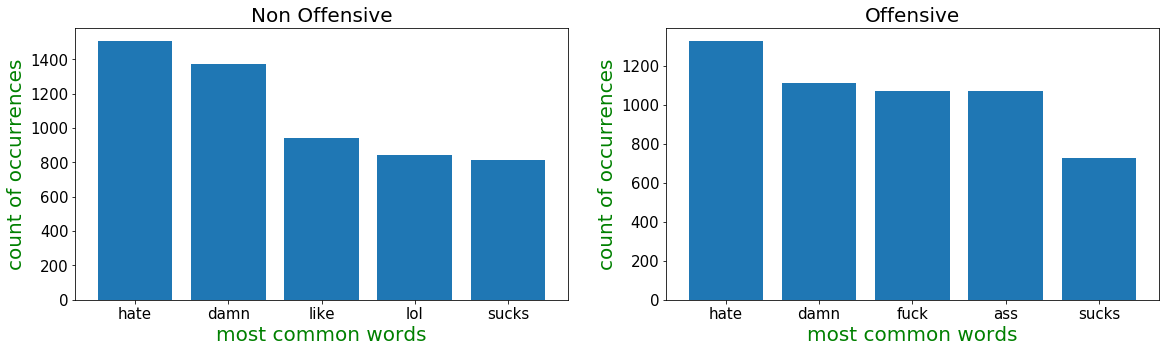

In [0]:
# This example is suitable for 5 words, if you chose more, adjust figsize/subplots/fontsize
plt.figure(figsize=(30, 5))

plt.subplot(132)
plt.title('Offensive', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('most common words', fontsize=20, color='green')
plt.ylabel('count of occurrences', fontsize=20, color='green')
neg1.plot()

plt.subplot(131)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Non Offensive', fontsize=20)
plt.xlabel('most common words', fontsize=20, color='green')
plt.ylabel('count of occurrences', fontsize=20, color='green')
pos1.plot()



In [0]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
stop_words = text.ENGLISH_STOP_WORDS

In [0]:
!pip3 install wordcloud

You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

In [0]:
class GenerateWordCloud:
    def __init__(self, corpus):
        self.corpus = corpus
        
    def __call__(self):
        self.processed_data = ''.join(self.corpus)
        self.wc = WordCloud(stopwords=stopwords, width=500, height=200).generate( self.processed_data)
        plt.imshow(self.wc)
        plt.show()

In [0]:
pos_wc = GenerateWordCloud(pos_data.content)

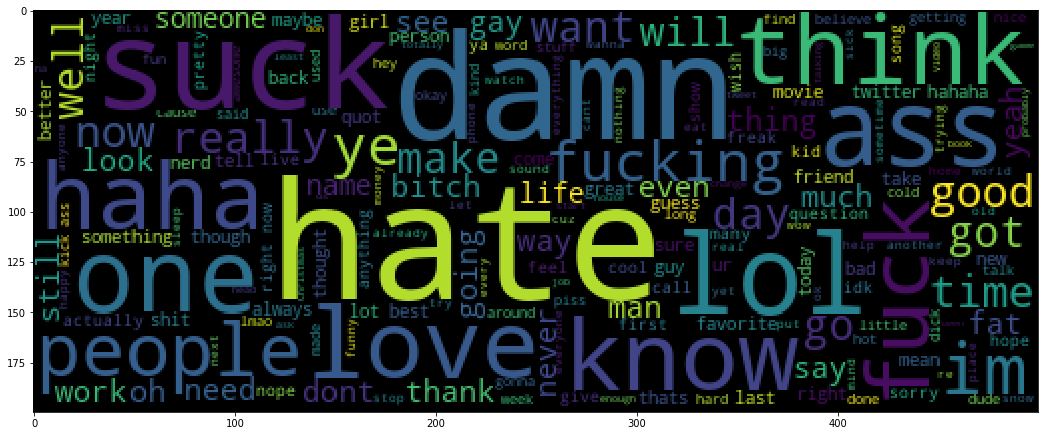

In [0]:
pos_wc()

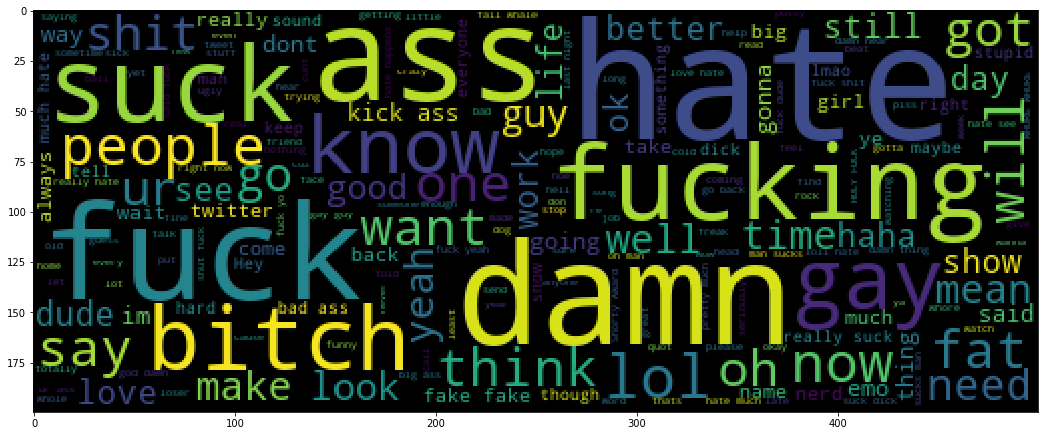

In [0]:
neg_wc()

In [0]:
from collections import Counter

In [0]:
class UniqueWords():
    
    def __init__(self, corpus):
        self.corpus = corpus
        
    def __call__(self):
        unique_words = set(self.corpus.split())
        percent_unique_words = len(unique_words)/len(self.corpus)
        return percent_unique_words
        

In [0]:
percent_pos_words = UniqueWords(pos_text)
pp = percent_pos_words()
pp

0.03655732008809053

In [0]:
percent_neg_words = UniqueWords(neg_text)
pn = percent_neg_words()
pn

0.019712789493249217

#### Non offensive comments use 1.8 times more unqiue words.

In [0]:
pp/pn

1.8544975636558105

### Polarity/Subjectivity

In [0]:
!pip3 install TextBlob

Some confirmation/different view on the labels. I will show the polarity of the text, when from -1 (very negative) to 1 (very positive). We should expect a higher number when the test is more positive and vice versa

In [0]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [0]:
pos_pol = pos_data.content.apply(pol)
neg_pol = neg_data.content.apply(pol)

No surprises here

In [0]:
pos_pol.mean(), neg_pol.mean()

(0.055331027693848386, -0.07459230184541647)

In [0]:
pos_sub = pos_data.content.apply(sub)
neg_sub = neg_data.content.apply(sub)

As to subjectivity, we see no big difference. While 1 being highly subjecive and 0 being much more objective, seems like offensive tweets are more opinionated, but still, with a rather log gap

In [0]:
pos_sub.mean(), neg_sub.mean()

(0.4661102521347998, 0.5265475218466436)

### Topic Modeling

In [0]:
!pip3 install gensim

    100% |████████████████████████████████| 24.7MB 1.2MB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 5.7MB/s ta 0:00:01
    100% |████████████████████████████████| 1.4MB 1.7MB/s ta 0:00:011
    100% |████████████████████████████████| 133kB 535kB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 9.1MB/s eta 0:00:01
    100% |████████████████████████████████| 5.7MB 1.8MB/s ta 0:00:01
    100% |████████████████████████████████| 552kB 1.3MB/s ta 0:00:011
  Running setup.py install for smart-open ... done
You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
from gensim import matutils, models
import scipy.sparse

In [0]:
cv = CountVectorizer(stop_words = stop_words)
data_cv = cv.fit_transform(train.content)
data_stop = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_stop.index = train.index

In [0]:
subjects_train = data_stop.transpose()

In [0]:
sparse_counts = scipy.sparse.csr_matrix(subjects)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [0]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [0]:
%time lda = models.LdaModel(corpus = corpus, id2word = id2word, num_topics = 2, passes = 10)
lda.print_topics()

CPU times: user 22.4 s, sys: 31.9 ms, total: 22.4 s
Wall time: 22.4 s


[(0,
  '0.017*"combo" + 0.010*"nl" + 0.009*"reformatted" + 0.008*"negativity" + 0.008*"fairr" + 0.008*"imovie" + 0.008*"forever21" + 0.008*"hear" + 0.007*"flashing" + 0.005*"slidinqq"'),
 (1,
  '0.019*"icystorm" + 0.011*"hit" + 0.011*"flashing" + 0.010*"stung" + 0.010*"indicates" + 0.010*"forever21" + 0.010*"goodies" + 0.009*"imovie" + 0.008*"ry" + 0.007*"hear"')]

In [0]:
%time lda = models.LdaModel(corpus = corpus, id2word = id2word, num_topics = 10, passes = 100)
lda.print_topics()

2019-09-29 14:21:21,999 : INFO : using symmetric alpha at 0.1
2019-09-29 14:21:22,000 : INFO : using symmetric eta at 0.1
2019-09-29 14:21:22,003 : INFO : using serial LDA version on this node
2019-09-29 14:21:22,021 : INFO : running online (multi-pass) LDA training, 10 topics, 100 passes over the supplied corpus of 12179 documents, updating model once every 2000 documents, evaluating perplexity every 12179 documents, iterating 50x with a convergence threshold of 0.001000
2019-09-29 14:21:22,031 : INFO : PROGRESS: pass 0, at document #2000/12179
2019-09-29 14:21:22,628 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:22,635 : INFO : topic #9 (0.100): 0.037*"forever21" + 0.026*"imovie" + 0.019*"hear" + 0.016*"combo" + 0.015*"reformatted" + 0.011*"answering" + 0.011*"ensemble" + 0.011*"cu" + 0.010*"lockes" + 0.010*"ry"
2019-09-29 14:21:22,636 : INFO : topic #1 (0.100): 0.052*"reformatted" + 0.021*"forever21" + 0.012*"answering" + 0.010*"combo"

2019-09-29 14:21:24,439 : INFO : topic #7 (0.100): 0.021*"mdr" + 0.016*"icystorm" + 0.014*"combo" + 0.014*"hit" + 0.012*"sauce" + 0.011*"cbarrett" + 0.010*"round" + 0.010*"generators" + 0.009*"strong_bow" + 0.009*"forever21"
2019-09-29 14:21:24,440 : INFO : topic #3 (0.100): 0.049*"flashing" + 0.048*"icystorm" + 0.014*"indicates" + 0.011*"ry" + 0.011*"neck" + 0.011*"hear" + 0.010*"russia" + 0.010*"forever21" + 0.010*"combo" + 0.009*"bagel"
2019-09-29 14:21:24,441 : INFO : topic diff=0.193314, rho=0.408248
2019-09-29 14:21:24,490 : INFO : -11.431 per-word bound, 2761.5 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:21:24,491 : INFO : PROGRESS: pass 0, at document #12179/12179
2019-09-29 14:21:24,523 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:21:24,531 : INFO : topic #4 (0.100): 0.028*"shouldnt" + 0.022*"maury" + 0.015*"flashing" + 0.015*"kewl" + 0.013*"fitted" + 0.012*"anominous" + 0.010*"pulls"

2019-09-29 14:21:26,210 : INFO : topic #2 (0.100): 0.047*"negativity" + 0.029*"lick" + 0.015*"airways" + 0.014*"juuust" + 0.013*"aging" + 0.013*"combo" + 0.011*"some1" + 0.011*"indicates" + 0.010*"awwwwww" + 0.010*"routine"
2019-09-29 14:21:26,211 : INFO : topic #1 (0.100): 0.041*"reformatted" + 0.012*"forever21" + 0.010*"promises" + 0.009*"ilike" + 0.008*"pavlova" + 0.008*"frack" + 0.008*"decepticonian" + 0.008*"couldn" + 0.007*"boyy" + 0.007*"braces"
2019-09-29 14:21:26,211 : INFO : topic diff=0.167610, rho=0.351592
2019-09-29 14:21:26,217 : INFO : PROGRESS: pass 1, at document #12000/12179
2019-09-29 14:21:26,450 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:26,457 : INFO : topic #3 (0.100): 0.055*"flashing" + 0.049*"icystorm" + 0.012*"ry" + 0.011*"indicates" + 0.010*"neck" + 0.010*"hear" + 0.010*"bagel" + 0.009*"combo" + 0.009*"forever21" + 0.009*"enclosing"
2019-09-29 14:21:26,457 : INFO : topic #0 (0.100): 0.035*"hit" + 0.026*"forev

2019-09-29 14:21:27,857 : INFO : topic #6 (0.100): 0.023*"forever21" + 0.017*"baithain" + 0.015*"reformatted" + 0.014*"remarks" + 0.014*"gastronomics" + 0.013*"draw" + 0.013*"combo" + 0.013*"motor" + 0.013*"icystorm" + 0.013*"answering"
2019-09-29 14:21:27,858 : INFO : topic #7 (0.100): 0.029*"combo" + 0.018*"generators" + 0.017*"cbarrett" + 0.016*"strong_bow" + 0.015*"forever21" + 0.013*"ensemble" + 0.012*"hit" + 0.010*"expressive" + 0.010*"sauce" + 0.010*"icystorm"
2019-09-29 14:21:27,859 : INFO : topic #2 (0.100): 0.032*"negativity" + 0.023*"lick" + 0.016*"juuust" + 0.016*"indicates" + 0.016*"combo" + 0.012*"airways" + 0.010*"aging" + 0.010*"routine" + 0.009*"entertaiin" + 0.009*"some1"
2019-09-29 14:21:27,859 : INFO : topic diff=0.153403, rho=0.331688
2019-09-29 14:21:27,865 : INFO : PROGRESS: pass 2, at document #10000/12179
2019-09-29 14:21:28,095 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:28,102 : INFO : topic #5 (0.100): 0.034*

2019-09-29 14:21:29,417 : INFO : topic #9 (0.100): 0.039*"imovie" + 0.028*"hear" + 0.027*"forever21" + 0.022*"stung" + 0.020*"combo" + 0.019*"ensemble" + 0.017*"ry" + 0.013*"icystorm" + 0.010*"aaye" + 0.009*"goodies"
2019-09-29 14:21:29,418 : INFO : topic #5 (0.100): 0.028*"ic" + 0.023*"babyyyyy" + 0.020*"everlasting" + 0.015*"juggalos" + 0.014*"combo" + 0.012*"struggle" + 0.012*"ceara" + 0.010*"belladonna" + 0.010*"nikon" + 0.009*"read"
2019-09-29 14:21:29,419 : INFO : topic #7 (0.100): 0.035*"combo" + 0.019*"generators" + 0.018*"cbarrett" + 0.017*"forever21" + 0.016*"strong_bow" + 0.015*"ensemble" + 0.011*"hit" + 0.011*"crybaby" + 0.009*"expressive" + 0.009*"icystorm"
2019-09-29 14:21:29,420 : INFO : topic diff=0.148880, rho=0.314822
2019-09-29 14:21:29,428 : INFO : PROGRESS: pass 3, at document #8000/12179
2019-09-29 14:21:29,672 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:29,679 : INFO : topic #3 (0.100): 0.046*"flashing" + 0.035*"i

2019-09-29 14:21:30,988 : INFO : topic #7 (0.100): 0.031*"combo" + 0.021*"generators" + 0.019*"cbarrett" + 0.015*"forever21" + 0.015*"strong_bow" + 0.011*"hit" + 0.010*"ensemble" + 0.010*"expressive" + 0.010*"crybaby" + 0.009*"nl"
2019-09-29 14:21:30,989 : INFO : topic #9 (0.100): 0.035*"imovie" + 0.027*"stung" + 0.026*"hear" + 0.024*"forever21" + 0.019*"ry" + 0.017*"combo" + 0.014*"ensemble" + 0.012*"icystorm" + 0.011*"goodies" + 0.009*"aaye"
2019-09-29 14:21:30,990 : INFO : topic #0 (0.100): 0.057*"forever21" + 0.040*"combo" + 0.033*"hit" + 0.017*"cu" + 0.017*"hear" + 0.014*"ooooh" + 0.012*"rockets" + 0.011*"imovie" + 0.011*"someones" + 0.010*"maury"
2019-09-29 14:21:30,990 : INFO : topic diff=0.146358, rho=0.300292
2019-09-29 14:21:30,998 : INFO : PROGRESS: pass 4, at document #6000/12179
2019-09-29 14:21:31,364 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:31,371 : INFO : topic #5 (0.100): 0.031*"ic" + 0.023*"babyyyyy" + 0.020*"everla

2019-09-29 14:21:32,572 : INFO : topic #1 (0.100): 0.063*"reformatted" + 0.015*"forever21" + 0.011*"ilike" + 0.010*"sparks" + 0.009*"promises" + 0.009*"subject" + 0.009*"pavlova" + 0.009*"douche" + 0.008*"intimidated" + 0.008*"combo"
2019-09-29 14:21:32,573 : INFO : topic #2 (0.100): 0.051*"negativity" + 0.027*"lick" + 0.022*"indicates" + 0.017*"airways" + 0.013*"juuust" + 0.012*"su" + 0.011*"some1" + 0.010*"aging" + 0.010*"combo" + 0.009*"job"
2019-09-29 14:21:32,574 : INFO : topic #4 (0.100): 0.017*"fitted" + 0.017*"kewl" + 0.016*"shouldnt" + 0.014*"maury" + 0.014*"ilovee" + 0.012*"combo" + 0.009*"anominous" + 0.008*"mtvs" + 0.008*"started" + 0.008*"slidinqq"
2019-09-29 14:21:32,575 : INFO : topic diff=0.206278, rho=0.287605
2019-09-29 14:21:32,583 : INFO : PROGRESS: pass 5, at document #4000/12179
2019-09-29 14:21:32,930 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:32,937 : INFO : topic #6 (0.100): 0.026*"forever21" + 0.017*"baithain"

2019-09-29 14:21:34,241 : INFO : topic #3 (0.100): 0.072*"flashing" + 0.037*"icystorm" + 0.014*"ry" + 0.012*"professor" + 0.012*"imovie" + 0.010*"fairr" + 0.009*"furthest" + 0.009*"jailbreak" + 0.009*"enclosing" + 0.009*"neck"
2019-09-29 14:21:34,242 : INFO : topic #9 (0.100): 0.041*"stung" + 0.029*"imovie" + 0.025*"hear" + 0.024*"ry" + 0.015*"goodies" + 0.014*"necessarily" + 0.012*"icystorm" + 0.012*"aaye" + 0.010*"ihave" + 0.010*"forever21"
2019-09-29 14:21:34,243 : INFO : topic #0 (0.100): 0.044*"hit" + 0.026*"forever21" + 0.018*"combo" + 0.016*"hear" + 0.016*"flattened" + 0.014*"maury" + 0.014*"rockets" + 0.014*"cu" + 0.013*"someones" + 0.013*"ooooh"
2019-09-29 14:21:34,244 : INFO : topic diff=0.090427, rho=0.287605
2019-09-29 14:21:34,250 : INFO : PROGRESS: pass 6, at document #2000/12179
2019-09-29 14:21:34,577 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:34,584 : INFO : topic #8 (0.100): 0.061*"answering" + 0.021*"imovie" + 0.019*

2019-09-29 14:21:36,059 : INFO : topic #7 (0.100): 0.018*"combo" + 0.015*"cbarrett" + 0.015*"generators" + 0.014*"strong_bow" + 0.013*"mdr" + 0.012*"round" + 0.012*"expressive" + 0.011*"crybaby" + 0.011*"couldn" + 0.010*"nl"
2019-09-29 14:21:36,060 : INFO : topic #5 (0.100): 0.046*"ic" + 0.022*"babyyyyy" + 0.015*"juggalos" + 0.012*"facts" + 0.011*"belladonna" + 0.010*"nikon" + 0.010*"struggle" + 0.010*"everlasting" + 0.010*"ceara" + 0.009*"reproduce"
2019-09-29 14:21:36,061 : INFO : topic #3 (0.100): 0.061*"flashing" + 0.040*"icystorm" + 0.012*"ry" + 0.010*"combo" + 0.010*"imovie" + 0.010*"cuffed" + 0.009*"enclosing" + 0.009*"professor" + 0.009*"neck" + 0.009*"hear"
2019-09-29 14:21:36,062 : INFO : topic diff=0.107473, rho=0.276400
2019-09-29 14:21:36,105 : INFO : -8.666 per-word bound, 406.2 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:21:36,106 : INFO : PROGRESS: pass 6, at document #12179/12179
2019-09-29 14:21:36,132 : INFO : merging 

2019-09-29 14:21:37,775 : INFO : topic #6 (0.100): 0.020*"forever21" + 0.015*"draw" + 0.014*"motor" + 0.014*"baithain" + 0.014*"icystorm" + 0.014*"remarks" + 0.013*"combo" + 0.012*"downloading" + 0.012*"gastronomics" + 0.012*"reformatted"
2019-09-29 14:21:37,776 : INFO : topic #1 (0.100): 0.055*"reformatted" + 0.015*"forever21" + 0.011*"ilike" + 0.010*"promises" + 0.009*"sparks" + 0.009*"icystorm" + 0.008*"douche" + 0.008*"combo" + 0.008*"pavlova" + 0.008*"bands"
2019-09-29 14:21:37,776 : INFO : topic #8 (0.100): 0.075*"answering" + 0.021*"imovie" + 0.017*"iloveyhuuu" + 0.016*"hes" + 0.012*"foolproof" + 0.012*"forsurre" + 0.010*"amasing" + 0.010*"frive" + 0.009*"streko" + 0.007*"kisses"
2019-09-29 14:21:37,777 : INFO : topic #2 (0.100): 0.045*"negativity" + 0.028*"lick" + 0.023*"indicates" + 0.017*"airways" + 0.015*"juuust" + 0.012*"aging" + 0.010*"routine" + 0.010*"some1" + 0.009*"su" + 0.009*"awwwwww"
2019-09-29 14:21:37,778 : INFO : topic diff=0.109982, rho=0.266411
2019-09-29 14:21

2019-09-29 14:21:39,455 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.015*"kewl" + 0.013*"ilovee" + 0.012*"shouldnt" + 0.011*"combo" + 0.010*"maury" + 0.010*"compares" + 0.009*"revolution" + 0.008*"anominous" + 0.008*"ayt"
2019-09-29 14:21:39,456 : INFO : topic #0 (0.100): 0.053*"forever21" + 0.036*"hit" + 0.034*"combo" + 0.018*"cu" + 0.017*"hear" + 0.016*"ooooh" + 0.015*"maury" + 0.013*"someones" + 0.013*"rockets" + 0.012*"imovie"
2019-09-29 14:21:39,457 : INFO : topic #9 (0.100): 0.038*"imovie" + 0.028*"stung" + 0.028*"hear" + 0.021*"ry" + 0.018*"forever21" + 0.016*"ensemble" + 0.016*"combo" + 0.014*"goodies" + 0.014*"icystorm" + 0.010*"aaye"
2019-09-29 14:21:39,458 : INFO : topic #6 (0.100): 0.024*"forever21" + 0.016*"baithain" + 0.016*"combo" + 0.015*"draw" + 0.014*"reformatted" + 0.014*"remarks" + 0.014*"gastronomics" + 0.014*"icystorm" + 0.013*"motor" + 0.012*"invisible"
2019-09-29 14:21:39,458 : INFO : topic diff=0.107150, rho=0.257432
2019-09-29 14:21:39,467 : INFO : PROGRESS: 

2019-09-29 14:21:41,111 : INFO : topic #5 (0.100): 0.032*"ic" + 0.023*"everlasting" + 0.023*"babyyyyy" + 0.014*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.011*"combo" + 0.010*"nikon" + 0.010*"ceara" + 0.010*"belladonna"
2019-09-29 14:21:41,112 : INFO : topic #7 (0.100): 0.033*"combo" + 0.019*"generators" + 0.018*"cbarrett" + 0.015*"forever21" + 0.014*"strong_bow" + 0.012*"crybaby" + 0.012*"ensemble" + 0.011*"couldn" + 0.011*"expressive" + 0.010*"hit"
2019-09-29 14:21:41,112 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.015*"ilovee" + 0.013*"kewl" + 0.013*"combo" + 0.010*"revolution" + 0.009*"shouldnt" + 0.009*"maury" + 0.008*"compares" + 0.008*"anominous" + 0.008*"mtvs"
2019-09-29 14:21:41,113 : INFO : topic #6 (0.100): 0.028*"forever21" + 0.019*"combo" + 0.017*"baithain" + 0.016*"reformatted" + 0.015*"gastronomics" + 0.015*"draw" + 0.014*"remarks" + 0.014*"answering" + 0.013*"motor" + 0.013*"invisible"
2019-09-29 14:21:41,114 : INFO : topic diff=0.120226, rho=0.249304
2019-09-29

2019-09-29 14:21:42,539 : INFO : topic #7 (0.100): 0.029*"combo" + 0.020*"generators" + 0.019*"cbarrett" + 0.013*"forever21" + 0.012*"strong_bow" + 0.011*"expressive" + 0.011*"couldn" + 0.011*"nl" + 0.011*"crybaby" + 0.011*"hit"
2019-09-29 14:21:42,540 : INFO : topic #8 (0.100): 0.091*"answering" + 0.022*"imovie" + 0.019*"hes" + 0.017*"iloveyhuuu" + 0.012*"forsurre" + 0.009*"foolproof" + 0.009*"frive" + 0.008*"drying" + 0.008*"commerical" + 0.007*"amasing"
2019-09-29 14:21:42,541 : INFO : topic #5 (0.100): 0.034*"ic" + 0.027*"babyyyyy" + 0.019*"everlasting" + 0.014*"juggalos" + 0.013*"struggle" + 0.013*"facts" + 0.010*"belladonna" + 0.010*"nikon" + 0.009*"combo" + 0.009*"ceara"
2019-09-29 14:21:42,542 : INFO : topic #1 (0.100): 0.070*"reformatted" + 0.020*"forever21" + 0.011*"douche" + 0.011*"combo" + 0.010*"promises" + 0.010*"ilike" + 0.010*"sparks" + 0.009*"icystorm" + 0.009*"bands" + 0.008*"lockes"
2019-09-29 14:21:42,542 : INFO : topic diff=0.125221, rho=0.241900
2019-09-29 14:21:4

2019-09-29 14:21:43,912 : INFO : topic #5 (0.100): 0.038*"ic" + 0.031*"babyyyyy" + 0.015*"facts" + 0.014*"struggle" + 0.014*"everlasting" + 0.014*"juggalos" + 0.011*"belladonna" + 0.010*"ceara" + 0.009*"indicates" + 0.009*"nikon"
2019-09-29 14:21:43,913 : INFO : topic #4 (0.100): 0.017*"fitted" + 0.017*"kewl" + 0.016*"shouldnt" + 0.015*"ilovee" + 0.011*"maury" + 0.010*"revolution" + 0.009*"combo" + 0.009*"anominous" + 0.008*"mtvs" + 0.008*"started"
2019-09-29 14:21:43,914 : INFO : topic #1 (0.100): 0.061*"reformatted" + 0.017*"forever21" + 0.011*"ilike" + 0.010*"sparks" + 0.009*"combo" + 0.009*"promises" + 0.009*"douche" + 0.009*"icystorm" + 0.008*"intimidated" + 0.008*"subject"
2019-09-29 14:21:43,915 : INFO : topic #8 (0.100): 0.069*"answering" + 0.021*"imovie" + 0.018*"iloveyhuuu" + 0.014*"hes" + 0.013*"forsurre" + 0.010*"amasing" + 0.009*"frive" + 0.008*"foolproof" + 0.008*"commerical" + 0.008*"kisses"
2019-09-29 14:21:43,915 : INFO : topic diff=0.154332, rho=0.235118
2019-09-29 14

2019-09-29 14:21:46,112 : INFO : topic #6 (0.100): 0.020*"downloading" + 0.016*"baithain" + 0.016*"motor" + 0.015*"draw" + 0.015*"remarks" + 0.015*"icystorm" + 0.013*"gastronomics" + 0.013*"forever21" + 0.012*"mdr" + 0.012*"intimidated"
2019-09-29 14:21:46,113 : INFO : topic #7 (0.100): 0.015*"combo" + 0.014*"cbarrett" + 0.014*"generators" + 0.014*"nl" + 0.014*"expressive" + 0.013*"couldn" + 0.012*"hit" + 0.012*"mdr" + 0.011*"round" + 0.011*"crybaby"
2019-09-29 14:21:46,114 : INFO : topic #3 (0.100): 0.067*"flashing" + 0.034*"icystorm" + 0.014*"ry" + 0.013*"professor" + 0.011*"imovie" + 0.011*"sauce" + 0.009*"jailbreak" + 0.009*"fairr" + 0.009*"furthest" + 0.009*"enclosing"
2019-09-29 14:21:46,115 : INFO : topic #8 (0.100): 0.050*"answering" + 0.019*"imovie" + 0.018*"iloveyhuuu" + 0.014*"amasing" + 0.013*"forsurre" + 0.011*"frive" + 0.010*"commerical" + 0.010*"hes" + 0.009*"phewwww" + 0.009*"kisses"
2019-09-29 14:21:46,115 : INFO : topic #2 (0.100): 0.066*"negativity" + 0.034*"lick" + 

2019-09-29 14:21:47,724 : INFO : topic #2 (0.100): 0.049*"negativity" + 0.031*"lick" + 0.023*"indicates" + 0.020*"airways" + 0.014*"juuust" + 0.012*"aging" + 0.011*"su" + 0.010*"routine" + 0.008*"some1" + 0.007*"awwwwww"
2019-09-29 14:21:47,725 : INFO : topic #9 (0.100): 0.036*"stung" + 0.035*"imovie" + 0.025*"ry" + 0.024*"hear" + 0.020*"goodies" + 0.014*"icystorm" + 0.013*"forever21" + 0.012*"glau" + 0.011*"indicates" + 0.011*"ensemble"
2019-09-29 14:21:47,725 : INFO : topic #4 (0.100): 0.017*"fitted" + 0.014*"kewl" + 0.013*"shouldnt" + 0.012*"revolution" + 0.010*"ilovee" + 0.009*"maury" + 0.009*"scholar" + 0.009*"ayt" + 0.008*"compares" + 0.008*"anominous"
2019-09-29 14:21:47,726 : INFO : topic #7 (0.100): 0.020*"combo" + 0.015*"cbarrett" + 0.015*"generators" + 0.012*"expressive" + 0.012*"strong_bow" + 0.012*"couldn" + 0.011*"round" + 0.011*"nl" + 0.011*"crybaby" + 0.011*"mdr"
2019-09-29 14:21:47,727 : INFO : topic #6 (0.100): 0.016*"forever21" + 0.015*"motor" + 0.015*"downloading" +

2019-09-29 14:21:49,193 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:49,200 : INFO : topic #0 (0.100): 0.045*"forever21" + 0.037*"hit" + 0.026*"combo" + 0.018*"cu" + 0.017*"maury" + 0.015*"hear" + 0.015*"ooooh" + 0.014*"someones" + 0.013*"rockets" + 0.013*"cuffed"
2019-09-29 14:21:49,201 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"kewl" + 0.013*"shouldnt" + 0.012*"ilovee" + 0.010*"revolution" + 0.009*"maury" + 0.009*"ayt" + 0.009*"compares" + 0.008*"combo" + 0.008*"anominous"
2019-09-29 14:21:49,202 : INFO : topic #9 (0.100): 0.035*"imovie" + 0.031*"stung" + 0.026*"hear" + 0.023*"ry" + 0.018*"goodies" + 0.015*"forever21" + 0.014*"icystorm" + 0.014*"ensemble" + 0.013*"combo" + 0.011*"indicates"
2019-09-29 14:21:49,203 : INFO : topic #8 (0.100): 0.082*"answering" + 0.020*"imovie" + 0.017*"iloveyhuuu" + 0.016*"hes" + 0.011*"forsurre" + 0.011*"foolproof" + 0.010*"frive" + 0.009*"amasing" + 0.008*"streko" + 0.007*"kisses"
2019-09-29 14

2019-09-29 14:21:50,469 : INFO : PROGRESS: pass 14, at document #8000/12179
2019-09-29 14:21:50,681 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:50,688 : INFO : topic #9 (0.100): 0.036*"imovie" + 0.028*"stung" + 0.027*"hear" + 0.020*"ry" + 0.018*"forever21" + 0.016*"ensemble" + 0.016*"combo" + 0.015*"goodies" + 0.013*"icystorm" + 0.010*"aaye"
2019-09-29 14:21:50,689 : INFO : topic #3 (0.100): 0.048*"flashing" + 0.029*"icystorm" + 0.017*"combo" + 0.011*"ry" + 0.011*"imovie" + 0.011*"sauce" + 0.010*"professor" + 0.010*"gearhound" + 0.009*"shifts" + 0.009*"jailbreak"
2019-09-29 14:21:50,691 : INFO : topic #2 (0.100): 0.034*"negativity" + 0.022*"lick" + 0.021*"indicates" + 0.015*"juuust" + 0.013*"airways" + 0.010*"aging" + 0.010*"routine" + 0.008*"entertaiin" + 0.008*"su" + 0.008*"some1"
2019-09-29 14:21:50,692 : INFO : topic #5 (0.100): 0.032*"ic" + 0.022*"babyyyyy" + 0.018*"everlasting" + 0.014*"juggalos" + 0.013*"struggle" + 0.012*"facts"

2019-09-29 14:21:51,880 : INFO : topic diff=0.112450, rho=0.212768
2019-09-29 14:21:51,889 : INFO : PROGRESS: pass 15, at document #6000/12179
2019-09-29 14:21:52,170 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:52,176 : INFO : topic #6 (0.100): 0.026*"forever21" + 0.019*"combo" + 0.017*"baithain" + 0.015*"reformatted" + 0.015*"gastronomics" + 0.014*"draw" + 0.014*"remarks" + 0.013*"motor" + 0.013*"answering" + 0.013*"icystorm"
2019-09-29 14:21:52,177 : INFO : topic #3 (0.100): 0.041*"flashing" + 0.027*"icystorm" + 0.019*"combo" + 0.011*"imovie" + 0.011*"sauce" + 0.011*"shifts" + 0.011*"ry" + 0.010*"gearhound" + 0.010*"hear" + 0.009*"fairr"
2019-09-29 14:21:52,178 : INFO : topic #4 (0.100): 0.016*"ilovee" + 0.015*"fitted" + 0.013*"kewl" + 0.012*"combo" + 0.010*"revolution" + 0.010*"shouldnt" + 0.009*"maury" + 0.008*"anominous" + 0.008*"compares" + 0.008*"ayt"
2019-09-29 14:21:52,179 : INFO : topic #2 (0.100): 0.031*"negativity" + 0.019*"

2019-09-29 14:21:53,250 : INFO : topic #1 (0.100): 0.059*"reformatted" + 0.017*"forever21" + 0.011*"ilike" + 0.010*"combo" + 0.010*"sparks" + 0.009*"promises" + 0.009*"lockes" + 0.009*"douche" + 0.009*"icystorm" + 0.008*"pavlova"
2019-09-29 14:21:53,251 : INFO : topic diff=0.129365, rho=0.208110
2019-09-29 14:21:53,259 : INFO : PROGRESS: pass 16, at document #4000/12179
2019-09-29 14:21:53,540 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:53,546 : INFO : topic #2 (0.100): 0.040*"negativity" + 0.022*"lick" + 0.020*"indicates" + 0.014*"juuust" + 0.013*"airways" + 0.009*"aging" + 0.009*"su" + 0.009*"some1" + 0.009*"routine" + 0.008*"douche"
2019-09-29 14:21:53,547 : INFO : topic #3 (0.100): 0.047*"flashing" + 0.029*"icystorm" + 0.016*"combo" + 0.011*"ry" + 0.010*"sauce" + 0.010*"imovie" + 0.010*"shifts" + 0.010*"jailbreak" + 0.010*"professor" + 0.009*"gearhound"
2019-09-29 14:21:53,548 : INFO : topic #7 (0.100): 0.027*"combo" + 0.020*"genera

2019-09-29 14:21:54,643 : INFO : topic #8 (0.100): 0.057*"answering" + 0.019*"imovie" + 0.018*"iloveyhuuu" + 0.013*"forsurre" + 0.013*"amasing" + 0.010*"frive" + 0.010*"hes" + 0.010*"commerical" + 0.009*"kisses" + 0.009*"phewwww"
2019-09-29 14:21:54,643 : INFO : topic diff=0.063566, rho=0.208110
2019-09-29 14:21:54,651 : INFO : PROGRESS: pass 17, at document #2000/12179
2019-09-29 14:21:54,938 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:54,946 : INFO : topic #7 (0.100): 0.024*"combo" + 0.017*"generators" + 0.016*"cbarrett" + 0.013*"expressive" + 0.012*"nl" + 0.012*"couldn" + 0.011*"hit" + 0.011*"crybaby" + 0.011*"strong_bow" + 0.011*"forever21"
2019-09-29 14:21:54,947 : INFO : topic #3 (0.100): 0.054*"flashing" + 0.030*"icystorm" + 0.014*"combo" + 0.013*"ry" + 0.011*"imovie" + 0.011*"professor" + 0.010*"sauce" + 0.009*"jailbreak" + 0.009*"fairr" + 0.008*"gearhound"
2019-09-29 14:21:54,947 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.03

2019-09-29 14:21:56,309 : INFO : topic #5 (0.100): 0.041*"ic" + 0.021*"babyyyyy" + 0.014*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.012*"everlasting" + 0.010*"belladonna" + 0.010*"nikon" + 0.009*"ceara" + 0.009*"indicates"
2019-09-29 14:21:56,310 : INFO : topic diff=0.076140, rho=0.203745
2019-09-29 14:21:56,353 : INFO : -8.515 per-word bound, 365.8 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:21:56,353 : INFO : PROGRESS: pass 17, at document #12179/12179
2019-09-29 14:21:56,375 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:21:56,383 : INFO : topic #1 (0.100): 0.041*"reformatted" + 0.014*"ilike" + 0.013*"forever21" + 0.013*"sparks" + 0.010*"pavlova" + 0.010*"icystorm" + 0.010*"promises" + 0.009*"intimidated" + 0.009*"subject" + 0.009*"dont"
2019-09-29 14:21:56,384 : INFO : topic #5 (0.100): 0.041*"ic" + 0.036*"babyyyyy" + 0.015*"juggalos" + 0.014*"facts" + 0.014*"struggle" + 0.011*"bellad

2019-09-29 14:21:57,724 : INFO : topic #0 (0.100): 0.045*"forever21" + 0.036*"hit" + 0.026*"combo" + 0.018*"cu" + 0.016*"maury" + 0.015*"hear" + 0.015*"ooooh" + 0.014*"cuffed" + 0.013*"someones" + 0.013*"rockets"
2019-09-29 14:21:57,725 : INFO : topic diff=0.079741, rho=0.199643
2019-09-29 14:21:57,732 : INFO : PROGRESS: pass 18, at document #12000/12179
2019-09-29 14:21:57,934 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:57,940 : INFO : topic #2 (0.100): 0.047*"negativity" + 0.029*"lick" + 0.022*"indicates" + 0.019*"airways" + 0.014*"juuust" + 0.012*"aging" + 0.010*"su" + 0.010*"routine" + 0.008*"some1" + 0.007*"awwwwww"
2019-09-29 14:21:57,941 : INFO : topic #3 (0.100): 0.054*"flashing" + 0.035*"icystorm" + 0.013*"ry" + 0.011*"cuffed" + 0.011*"combo" + 0.011*"sauce" + 0.010*"professor" + 0.009*"imovie" + 0.009*"enclosing" + 0.009*"filipina"
2019-09-29 14:21:57,942 : INFO : topic #8 (0.100): 0.074*"answering" + 0.019*"iloveyhuuu" + 0.01

2019-09-29 14:21:59,163 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.015*"kewl" + 0.015*"ilovee" + 0.012*"shouldnt" + 0.010*"combo" + 0.010*"revolution" + 0.009*"compares" + 0.009*"maury" + 0.008*"anominous" + 0.008*"ayt"
2019-09-29 14:21:59,163 : INFO : topic diff=0.074922, rho=0.195779
2019-09-29 14:21:59,170 : INFO : PROGRESS: pass 19, at document #10000/12179
2019-09-29 14:21:59,363 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:21:59,369 : INFO : topic #6 (0.100): 0.020*"forever21" + 0.014*"baithain" + 0.014*"draw" + 0.014*"icystorm" + 0.014*"motor" + 0.013*"combo" + 0.013*"remarks" + 0.012*"gastronomics" + 0.012*"reformatted" + 0.012*"sister"
2019-09-29 14:21:59,370 : INFO : topic #2 (0.100): 0.041*"negativity" + 0.025*"lick" + 0.022*"indicates" + 0.015*"airways" + 0.014*"juuust" + 0.011*"aging" + 0.009*"routine" + 0.009*"su" + 0.009*"some1" + 0.008*"awwwwww"
2019-09-29 14:21:59,371 : INFO : topic #1 (0.100): 0.054*"reformatted" + 0.01

2019-09-29 14:22:00,556 : INFO : topic #0 (0.100): 0.057*"forever21" + 0.035*"combo" + 0.034*"hit" + 0.018*"cu" + 0.016*"hear" + 0.016*"ooooh" + 0.014*"imovie" + 0.012*"maury" + 0.011*"someones" + 0.011*"rockets"
2019-09-29 14:22:00,557 : INFO : topic diff=0.094594, rho=0.192132
2019-09-29 14:22:00,565 : INFO : PROGRESS: pass 20, at document #8000/12179
2019-09-29 14:22:00,788 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:00,795 : INFO : topic #5 (0.100): 0.032*"ic" + 0.022*"babyyyyy" + 0.018*"everlasting" + 0.014*"juggalos" + 0.013*"struggle" + 0.012*"facts" + 0.010*"ceara" + 0.010*"nikon" + 0.010*"belladonna" + 0.008*"combo"
2019-09-29 14:22:00,796 : INFO : topic #9 (0.100): 0.036*"imovie" + 0.028*"stung" + 0.027*"hear" + 0.019*"ry" + 0.018*"forever21" + 0.015*"ensemble" + 0.015*"combo" + 0.014*"goodies" + 0.013*"icystorm" + 0.010*"aaye"
2019-09-29 14:22:00,797 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.015*"ilovee" + 0.015*"kewl" + 

2019-09-29 14:22:01,921 : INFO : topic #1 (0.100): 0.064*"reformatted" + 0.020*"forever21" + 0.012*"combo" + 0.010*"lockes" + 0.010*"ilike" + 0.010*"promises" + 0.009*"douche" + 0.009*"sparks" + 0.009*"icystorm" + 0.008*"bands"
2019-09-29 14:22:01,922 : INFO : topic diff=0.099451, rho=0.188681
2019-09-29 14:22:01,930 : INFO : PROGRESS: pass 21, at document #6000/12179
2019-09-29 14:22:02,214 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:02,220 : INFO : topic #5 (0.100): 0.032*"ic" + 0.023*"babyyyyy" + 0.020*"everlasting" + 0.014*"facts" + 0.014*"juggalos" + 0.013*"struggle" + 0.010*"nikon" + 0.010*"belladonna" + 0.010*"ceara" + 0.009*"combo"
2019-09-29 14:22:02,221 : INFO : topic #0 (0.100): 0.057*"forever21" + 0.035*"combo" + 0.034*"hit" + 0.018*"cu" + 0.016*"hear" + 0.016*"ooooh" + 0.014*"imovie" + 0.012*"maury" + 0.011*"someones" + 0.011*"rockets"
2019-09-29 14:22:02,221 : INFO : topic #7 (0.100): 0.029*"combo" + 0.019*"generators" + 0

2019-09-29 14:22:03,269 : INFO : topic #6 (0.100): 0.020*"forever21" + 0.015*"baithain" + 0.014*"draw" + 0.014*"motor" + 0.014*"downloading" + 0.014*"gastronomics" + 0.013*"remarks" + 0.013*"icystorm" + 0.013*"combo" + 0.013*"mdr"
2019-09-29 14:22:03,269 : INFO : topic diff=0.109210, rho=0.185409
2019-09-29 14:22:03,277 : INFO : PROGRESS: pass 22, at document #4000/12179
2019-09-29 14:22:03,548 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:03,555 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.029*"stung" + 0.027*"hear" + 0.020*"forever21" + 0.019*"ry" + 0.015*"combo" + 0.014*"goodies" + 0.013*"ensemble" + 0.012*"icystorm" + 0.010*"aaye"
2019-09-29 14:22:03,556 : INFO : topic #0 (0.100): 0.053*"forever21" + 0.034*"hit" + 0.033*"combo" + 0.017*"cu" + 0.016*"hear" + 0.016*"ooooh" + 0.013*"imovie" + 0.013*"maury" + 0.012*"cuffed" + 0.011*"someones"
2019-09-29 14:22:03,556 : INFO : topic #3 (0.100): 0.048*"flashing" + 0.029*"icystorm" + 0.016*"

2019-09-29 14:22:04,598 : INFO : topic #9 (0.100): 0.037*"stung" + 0.031*"imovie" + 0.025*"hear" + 0.022*"ry" + 0.017*"goodies" + 0.012*"forever21" + 0.012*"icystorm" + 0.012*"necessarily" + 0.011*"aaye" + 0.010*"indicates"
2019-09-29 14:22:04,598 : INFO : topic diff=0.055915, rho=0.185409
2019-09-29 14:22:04,605 : INFO : PROGRESS: pass 23, at document #2000/12179
2019-09-29 14:22:04,873 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:04,879 : INFO : topic #3 (0.100): 0.053*"flashing" + 0.030*"icystorm" + 0.013*"combo" + 0.013*"ry" + 0.011*"sauce" + 0.010*"professor" + 0.010*"imovie" + 0.009*"jailbreak" + 0.008*"fairr" + 0.008*"gearhound"
2019-09-29 14:22:04,880 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.032*"stung" + 0.027*"hear" + 0.020*"ry" + 0.017*"forever21" + 0.014*"goodies" + 0.013*"combo" + 0.011*"icystorm" + 0.011*"ensemble" + 0.011*"aaye"
2019-09-29 14:22:04,881 : INFO : topic #1 (0.100): 0.058*"reformatted" + 0.017*"forever21"

2019-09-29 14:22:06,129 : INFO : topic #6 (0.100): 0.017*"forever21" + 0.014*"motor" + 0.014*"draw" + 0.014*"baithain" + 0.014*"icystorm" + 0.014*"remarks" + 0.014*"downloading" + 0.013*"mdr" + 0.012*"sister" + 0.011*"intimidated"
2019-09-29 14:22:06,130 : INFO : topic diff=0.065707, rho=0.182302
2019-09-29 14:22:06,169 : INFO : -8.512 per-word bound, 365.0 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:22:06,169 : INFO : PROGRESS: pass 23, at document #12179/12179
2019-09-29 14:22:06,190 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:22:06,196 : INFO : topic #8 (0.100): 0.062*"answering" + 0.019*"imovie" + 0.018*"iloveyhuuu" + 0.013*"forsurre" + 0.012*"amasing" + 0.011*"hes" + 0.010*"frive" + 0.009*"commerical" + 0.008*"kisses" + 0.008*"foolproof"
2019-09-29 14:22:06,196 : INFO : topic #3 (0.100): 0.062*"flashing" + 0.032*"icystorm" + 0.015*"ry" + 0.012*"professor" + 0.011*"sauce" + 0.010*"imovie"

2019-09-29 14:22:07,481 : INFO : topic #0 (0.100): 0.044*"forever21" + 0.035*"hit" + 0.027*"combo" + 0.017*"cu" + 0.016*"maury" + 0.015*"hear" + 0.015*"ooooh" + 0.014*"cuffed" + 0.013*"someones" + 0.013*"imovie"
2019-09-29 14:22:07,482 : INFO : topic diff=0.069241, rho=0.179347
2019-09-29 14:22:07,489 : INFO : PROGRESS: pass 24, at document #12000/12179
2019-09-29 14:22:07,685 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:07,691 : INFO : topic #5 (0.100): 0.040*"ic" + 0.021*"babyyyyy" + 0.014*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.012*"everlasting" + 0.010*"belladonna" + 0.009*"nikon" + 0.009*"ceara" + 0.009*"indicates"
2019-09-29 14:22:07,692 : INFO : topic #9 (0.100): 0.034*"imovie" + 0.034*"stung" + 0.024*"hear" + 0.023*"ry" + 0.019*"goodies" + 0.013*"forever21" + 0.013*"icystorm" + 0.011*"ensemble" + 0.011*"glau" + 0.011*"indicates"
2019-09-29 14:22:07,693 : INFO : topic #7 (0.100): 0.020*"combo" + 0.015*"cbarrett" + 0.015*

2019-09-29 14:22:08,821 : INFO : topic #1 (0.100): 0.061*"reformatted" + 0.019*"forever21" + 0.012*"combo" + 0.011*"promises" + 0.010*"lockes" + 0.009*"ilike" + 0.009*"icystorm" + 0.008*"layoffs" + 0.008*"sparks" + 0.008*"douche"
2019-09-29 14:22:08,822 : INFO : topic diff=0.064713, rho=0.176530
2019-09-29 14:22:08,833 : INFO : PROGRESS: pass 25, at document #10000/12179
2019-09-29 14:22:09,024 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:09,030 : INFO : topic #6 (0.100): 0.019*"forever21" + 0.014*"baithain" + 0.014*"draw" + 0.014*"motor" + 0.014*"icystorm" + 0.013*"remarks" + 0.013*"combo" + 0.012*"gastronomics" + 0.012*"reformatted" + 0.011*"sister"
2019-09-29 14:22:09,031 : INFO : topic #2 (0.100): 0.041*"negativity" + 0.025*"lick" + 0.022*"indicates" + 0.015*"airways" + 0.014*"juuust" + 0.011*"aging" + 0.009*"routine" + 0.009*"su" + 0.008*"some1" + 0.007*"awwwwww"
2019-09-29 14:22:09,032 : INFO : topic #7 (0.100): 0.023*"combo" + 0.0

2019-09-29 14:22:10,132 : INFO : topic #8 (0.100): 0.115*"answering" + 0.022*"imovie" + 0.019*"hes" + 0.017*"iloveyhuuu" + 0.012*"forsurre" + 0.009*"foolproof" + 0.007*"frive" + 0.007*"streko" + 0.007*"narrow" + 0.007*"drying"
2019-09-29 14:22:10,133 : INFO : topic diff=0.084211, rho=0.173842
2019-09-29 14:22:10,141 : INFO : PROGRESS: pass 26, at document #8000/12179
2019-09-29 14:22:10,333 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:10,339 : INFO : topic #3 (0.100): 0.047*"flashing" + 0.029*"icystorm" + 0.016*"combo" + 0.012*"ry" + 0.011*"sauce" + 0.010*"imovie" + 0.010*"professor" + 0.009*"gearhound" + 0.009*"shifts" + 0.009*"jailbreak"
2019-09-29 14:22:10,340 : INFO : topic #0 (0.100): 0.050*"forever21" + 0.034*"hit" + 0.030*"combo" + 0.017*"cu" + 0.016*"hear" + 0.015*"ooooh" + 0.014*"maury" + 0.013*"imovie" + 0.013*"someones" + 0.012*"cuffed"
2019-09-29 14:22:10,341 : INFO : topic #8 (0.100): 0.104*"answering" + 0.021*"imovie" + 0.0

2019-09-29 14:22:11,360 : INFO : topic #5 (0.100): 0.034*"ic" + 0.026*"babyyyyy" + 0.017*"everlasting" + 0.014*"struggle" + 0.014*"facts" + 0.013*"juggalos" + 0.010*"belladonna" + 0.009*"nikon" + 0.009*"ceara" + 0.008*"combo"
2019-09-29 14:22:11,361 : INFO : topic diff=0.088233, rho=0.171273
2019-09-29 14:22:11,369 : INFO : PROGRESS: pass 27, at document #6000/12179
2019-09-29 14:22:11,626 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:11,634 : INFO : topic #3 (0.100): 0.042*"flashing" + 0.027*"icystorm" + 0.018*"combo" + 0.011*"sauce" + 0.011*"ry" + 0.011*"imovie" + 0.010*"shifts" + 0.009*"gearhound" + 0.009*"professor" + 0.009*"hear"
2019-09-29 14:22:11,634 : INFO : topic #1 (0.100): 0.065*"reformatted" + 0.021*"forever21" + 0.013*"combo" + 0.011*"promises" + 0.011*"lockes" + 0.009*"douche" + 0.009*"ilike" + 0.009*"sparks" + 0.009*"layoffs" + 0.009*"icystorm"
2019-09-29 14:22:11,636 : INFO : topic #4 (0.100): 0.016*"ilovee" + 0.015*"fitt

2019-09-29 14:22:12,600 : INFO : topic #5 (0.100): 0.037*"ic" + 0.029*"babyyyyy" + 0.015*"facts" + 0.014*"struggle" + 0.014*"everlasting" + 0.013*"juggalos" + 0.010*"belladonna" + 0.010*"ceara" + 0.009*"indicates" + 0.009*"nikon"
2019-09-29 14:22:12,601 : INFO : topic diff=0.095291, rho=0.168815
2019-09-29 14:22:12,609 : INFO : PROGRESS: pass 28, at document #4000/12179
2019-09-29 14:22:12,870 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:12,876 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"ilovee" + 0.015*"kewl" + 0.012*"shouldnt" + 0.011*"combo" + 0.010*"revolution" + 0.009*"maury" + 0.008*"compares" + 0.008*"scholar" + 0.008*"anominous"
2019-09-29 14:22:12,877 : INFO : topic #0 (0.100): 0.051*"forever21" + 0.034*"hit" + 0.031*"combo" + 0.017*"cu" + 0.016*"hear" + 0.016*"ooooh" + 0.013*"maury" + 0.013*"imovie" + 0.012*"cuffed" + 0.011*"someones"
2019-09-29 14:22:12,878 : INFO : topic #6 (0.100): 0.022*"forever21" + 0.016*"baithain"

2019-09-29 14:22:13,850 : INFO : topic #6 (0.100): 0.017*"downloading" + 0.015*"baithain" + 0.015*"mdr" + 0.015*"forever21" + 0.015*"motor" + 0.014*"draw" + 0.014*"remarks" + 0.014*"icystorm" + 0.013*"gastronomics" + 0.011*"sister"
2019-09-29 14:22:13,851 : INFO : topic diff=0.050886, rho=0.168815
2019-09-29 14:22:13,857 : INFO : PROGRESS: pass 29, at document #2000/12179
2019-09-29 14:22:14,108 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:14,114 : INFO : topic #2 (0.100): 0.047*"negativity" + 0.026*"lick" + 0.021*"indicates" + 0.016*"airways" + 0.013*"juuust" + 0.011*"su" + 0.010*"aging" + 0.010*"some1" + 0.008*"routine" + 0.008*"job"
2019-09-29 14:22:14,115 : INFO : topic #5 (0.100): 0.037*"ic" + 0.029*"babyyyyy" + 0.015*"facts" + 0.014*"struggle" + 0.014*"everlasting" + 0.013*"juggalos" + 0.010*"belladonna" + 0.010*"ceara" + 0.009*"indicates" + 0.009*"nikon"
2019-09-29 14:22:14,116 : INFO : topic #6 (0.100): 0.020*"forever21" + 0.015*

2019-09-29 14:22:15,283 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.014*"kewl" + 0.012*"shouldnt" + 0.012*"ilovee" + 0.011*"revolution" + 0.008*"compares" + 0.008*"maury" + 0.008*"scholar" + 0.008*"ayt" + 0.008*"anominous"
2019-09-29 14:22:15,284 : INFO : topic diff=0.059370, rho=0.166460
2019-09-29 14:22:15,322 : INFO : -8.479 per-word bound, 356.9 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:22:15,323 : INFO : PROGRESS: pass 29, at document #12179/12179
2019-09-29 14:22:15,343 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:22:15,349 : INFO : topic #0 (0.100): 0.038*"hit" + 0.035*"forever21" + 0.021*"combo" + 0.016*"hear" + 0.015*"maury" + 0.015*"cu" + 0.014*"cuffed" + 0.014*"ooooh" + 0.013*"flattened" + 0.013*"someones"
2019-09-29 14:22:15,350 : INFO : topic #2 (0.100): 0.057*"negativity" + 0.030*"lick" + 0.023*"indicates" + 0.020*"airways" + 0.014*"juuust" + 0.013*"su" + 0.012*"aging" + 0.00

2019-09-29 14:22:16,659 : INFO : topic #8 (0.100): 0.096*"answering" + 0.020*"imovie" + 0.016*"iloveyhuuu" + 0.015*"hes" + 0.011*"forsurre" + 0.010*"foolproof" + 0.008*"amasing" + 0.008*"streko" + 0.008*"frive" + 0.007*"goodies"
2019-09-29 14:22:16,660 : INFO : topic diff=0.062224, rho=0.164201
2019-09-29 14:22:16,666 : INFO : PROGRESS: pass 30, at document #12000/12179
2019-09-29 14:22:16,881 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:16,888 : INFO : topic #9 (0.100): 0.034*"imovie" + 0.033*"stung" + 0.025*"hear" + 0.022*"ry" + 0.018*"goodies" + 0.014*"forever21" + 0.013*"icystorm" + 0.011*"ensemble" + 0.011*"combo" + 0.011*"glau"
2019-09-29 14:22:16,889 : INFO : topic #0 (0.100): 0.039*"forever21" + 0.038*"hit" + 0.022*"combo" + 0.017*"cu" + 0.016*"maury" + 0.015*"hear" + 0.015*"cuffed" + 0.015*"ooooh" + 0.014*"someones" + 0.013*"rockets"
2019-09-29 14:22:16,890 : INFO : topic #5 (0.100): 0.039*"ic" + 0.021*"babyyyyy" + 0.014*"juggal

2019-09-29 14:22:18,144 : INFO : topic #5 (0.100): 0.032*"ic" + 0.022*"babyyyyy" + 0.017*"everlasting" + 0.014*"juggalos" + 0.013*"struggle" + 0.013*"facts" + 0.010*"ceara" + 0.010*"belladonna" + 0.009*"nikon" + 0.008*"combo"
2019-09-29 14:22:18,145 : INFO : topic diff=0.057066, rho=0.162031
2019-09-29 14:22:18,151 : INFO : PROGRESS: pass 31, at document #10000/12179
2019-09-29 14:22:18,356 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:18,363 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"kewl" + 0.014*"ilovee" + 0.012*"shouldnt" + 0.009*"revolution" + 0.009*"combo" + 0.009*"compares" + 0.009*"maury" + 0.008*"ayt" + 0.008*"anominous"
2019-09-29 14:22:18,364 : INFO : topic #7 (0.100): 0.023*"combo" + 0.016*"generators" + 0.016*"cbarrett" + 0.012*"expressive" + 0.011*"crybaby" + 0.011*"forever21" + 0.011*"couldn" + 0.010*"round" + 0.010*"nl" + 0.010*"strong_bow"
2019-09-29 14:22:18,365 : INFO : topic #5 (0.100): 0.035*"ic" + 0.021*"baby

2019-09-29 14:22:19,524 : INFO : topic #2 (0.100): 0.033*"negativity" + 0.020*"indicates" + 0.020*"lick" + 0.015*"juuust" + 0.011*"airways" + 0.009*"entertaiin" + 0.008*"combo" + 0.008*"aging" + 0.008*"douche" + 0.008*"routine"
2019-09-29 14:22:19,525 : INFO : topic diff=0.076985, rho=0.159945
2019-09-29 14:22:19,533 : INFO : PROGRESS: pass 32, at document #8000/12179
2019-09-29 14:22:19,733 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:19,739 : INFO : topic #5 (0.100): 0.032*"ic" + 0.022*"babyyyyy" + 0.017*"everlasting" + 0.014*"juggalos" + 0.013*"struggle" + 0.013*"facts" + 0.010*"ceara" + 0.010*"belladonna" + 0.009*"nikon" + 0.008*"combo"
2019-09-29 14:22:19,740 : INFO : topic #2 (0.100): 0.035*"negativity" + 0.022*"lick" + 0.021*"indicates" + 0.015*"juuust" + 0.013*"airways" + 0.010*"aging" + 0.009*"routine" + 0.008*"su" + 0.008*"some1" + 0.008*"entertaiin"
2019-09-29 14:22:19,741 : INFO : topic #3 (0.100): 0.047*"flashing" + 0.028*"i

2019-09-29 14:22:20,771 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.029*"stung" + 0.027*"hear" + 0.019*"forever21" + 0.019*"ry" + 0.015*"combo" + 0.014*"goodies" + 0.013*"ensemble" + 0.012*"icystorm" + 0.010*"indicates"
2019-09-29 14:22:20,771 : INFO : topic diff=0.080724, rho=0.157937
2019-09-29 14:22:20,780 : INFO : PROGRESS: pass 33, at document #6000/12179
2019-09-29 14:22:21,042 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:21,049 : INFO : topic #7 (0.100): 0.028*"combo" + 0.018*"generators" + 0.017*"cbarrett" + 0.013*"forever21" + 0.011*"crybaby" + 0.011*"couldn" + 0.011*"expressive" + 0.010*"strong_bow" + 0.010*"ensemble" + 0.010*"hit"
2019-09-29 14:22:21,049 : INFO : topic #6 (0.100): 0.024*"forever21" + 0.016*"combo" + 0.016*"baithain" + 0.014*"reformatted" + 0.014*"gastronomics" + 0.014*"draw" + 0.014*"remarks" + 0.013*"motor" + 0.012*"icystorm" + 0.012*"invisible"
2019-09-29 14:22:21,050 : INFO : topic #5 (0.100): 0.032*"ic" 

2019-09-29 14:22:22,048 : INFO : topic #7 (0.100): 0.023*"combo" + 0.017*"generators" + 0.016*"cbarrett" + 0.012*"expressive" + 0.011*"couldn" + 0.011*"nl" + 0.011*"forever21" + 0.011*"crybaby" + 0.011*"hit" + 0.010*"strong_bow"
2019-09-29 14:22:22,050 : INFO : topic diff=0.085214, rho=0.156004
2019-09-29 14:22:22,058 : INFO : PROGRESS: pass 34, at document #4000/12179
2019-09-29 14:22:22,303 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:22,310 : INFO : topic #2 (0.100): 0.040*"negativity" + 0.023*"lick" + 0.020*"indicates" + 0.014*"juuust" + 0.014*"airways" + 0.009*"aging" + 0.009*"su" + 0.009*"some1" + 0.008*"routine" + 0.008*"douche"
2019-09-29 14:22:22,310 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"kewl" + 0.015*"ilovee" + 0.012*"shouldnt" + 0.011*"combo" + 0.010*"revolution" + 0.009*"maury" + 0.008*"compares" + 0.008*"scholar" + 0.008*"anominous"
2019-09-29 14:22:22,311 : INFO : topic #6 (0.100): 0.022*"forever21" + 0.016*"ba

2019-09-29 14:22:23,298 : INFO : topic #5 (0.100): 0.039*"ic" + 0.032*"babyyyyy" + 0.014*"juggalos" + 0.014*"facts" + 0.013*"struggle" + 0.011*"everlasting" + 0.011*"belladonna" + 0.010*"ceara" + 0.009*"indicates" + 0.008*"pongo"
2019-09-29 14:22:23,299 : INFO : topic diff=0.046604, rho=0.156004
2019-09-29 14:22:23,306 : INFO : PROGRESS: pass 35, at document #2000/12179
2019-09-29 14:22:23,570 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:23,576 : INFO : topic #2 (0.100): 0.047*"negativity" + 0.026*"lick" + 0.021*"indicates" + 0.016*"airways" + 0.013*"juuust" + 0.011*"su" + 0.010*"aging" + 0.010*"some1" + 0.008*"routine" + 0.008*"job"
2019-09-29 14:22:23,577 : INFO : topic #8 (0.100): 0.090*"answering" + 0.019*"imovie" + 0.017*"iloveyhuuu" + 0.014*"hes" + 0.012*"forsurre" + 0.009*"amasing" + 0.008*"foolproof" + 0.008*"frive" + 0.007*"streko" + 0.007*"commerical"
2019-09-29 14:22:23,578 : INFO : topic #7 (0.100): 0.023*"combo" + 0.017*"gen

2019-09-29 14:22:24,773 : INFO : topic #9 (0.100): 0.034*"imovie" + 0.033*"stung" + 0.025*"hear" + 0.022*"ry" + 0.018*"goodies" + 0.014*"forever21" + 0.013*"icystorm" + 0.011*"ensemble" + 0.011*"combo" + 0.011*"indicates"
2019-09-29 14:22:24,774 : INFO : topic diff=0.054264, rho=0.154139
2019-09-29 14:22:24,811 : INFO : -8.465 per-word bound, 353.3 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:22:24,811 : INFO : PROGRESS: pass 35, at document #12179/12179
2019-09-29 14:22:24,838 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:22:24,845 : INFO : topic #4 (0.100): 0.017*"shouldnt" + 0.017*"kewl" + 0.016*"ilovee" + 0.015*"fitted" + 0.011*"revolution" + 0.010*"anominous" + 0.009*"maury" + 0.009*"ayt" + 0.008*"compares" + 0.008*"started"
2019-09-29 14:22:24,846 : INFO : topic #6 (0.100): 0.016*"downloading" + 0.015*"baithain" + 0.015*"forever21" + 0.015*"mdr" + 0.015*"motor" + 0.014*"draw" + 0.014*"rema

2019-09-29 14:22:26,096 : INFO : topic #3 (0.100): 0.049*"flashing" + 0.030*"icystorm" + 0.013*"combo" + 0.012*"ry" + 0.011*"sauce" + 0.010*"imovie" + 0.010*"professor" + 0.009*"cuffed" + 0.008*"gearhound" + 0.008*"jailbreak"
2019-09-29 14:22:26,097 : INFO : topic #9 (0.100): 0.034*"imovie" + 0.030*"stung" + 0.026*"hear" + 0.021*"ry" + 0.016*"goodies" + 0.016*"forever21" + 0.013*"icystorm" + 0.013*"ensemble" + 0.013*"combo" + 0.011*"indicates"
2019-09-29 14:22:26,098 : INFO : topic diff=0.056633, rho=0.152340
2019-09-29 14:22:26,105 : INFO : PROGRESS: pass 36, at document #12000/12179
2019-09-29 14:22:26,290 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:26,296 : INFO : topic #0 (0.100): 0.039*"forever21" + 0.037*"hit" + 0.022*"combo" + 0.017*"cu" + 0.016*"maury" + 0.015*"hear" + 0.015*"cuffed" + 0.015*"ooooh" + 0.014*"someones" + 0.013*"rockets"
2019-09-29 14:22:26,297 : INFO : topic #3 (0.100): 0.051*"flashing" + 0.032*"icystorm" + 0.013

2019-09-29 14:22:27,397 : INFO : topic #5 (0.100): 0.032*"ic" + 0.022*"babyyyyy" + 0.017*"everlasting" + 0.014*"juggalos" + 0.013*"facts" + 0.013*"struggle" + 0.010*"ceara" + 0.010*"belladonna" + 0.009*"nikon" + 0.008*"combo"
2019-09-29 14:22:27,398 : INFO : topic #6 (0.100): 0.022*"forever21" + 0.015*"baithain" + 0.015*"combo" + 0.014*"draw" + 0.014*"remarks" + 0.013*"reformatted" + 0.013*"gastronomics" + 0.013*"motor" + 0.013*"icystorm" + 0.011*"invisible"
2019-09-29 14:22:27,399 : INFO : topic diff=0.051753, rho=0.150603
2019-09-29 14:22:27,406 : INFO : PROGRESS: pass 37, at document #10000/12179
2019-09-29 14:22:27,607 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:27,614 : INFO : topic #0 (0.100): 0.044*"forever21" + 0.035*"hit" + 0.026*"combo" + 0.017*"cu" + 0.015*"hear" + 0.015*"maury" + 0.015*"ooooh" + 0.014*"cuffed" + 0.013*"someones" + 0.012*"rockets"
2019-09-29 14:22:27,615 : INFO : topic #2 (0.100): 0.041*"negativity" + 0.024*"

2019-09-29 14:22:28,737 : INFO : topic #4 (0.100): 0.015*"ilovee" + 0.015*"fitted" + 0.013*"kewl" + 0.011*"combo" + 0.011*"shouldnt" + 0.010*"revolution" + 0.008*"compares" + 0.008*"maury" + 0.008*"anominous" + 0.007*"ayt"
2019-09-29 14:22:28,738 : INFO : topic #9 (0.100): 0.035*"imovie" + 0.027*"hear" + 0.026*"stung" + 0.020*"forever21" + 0.018*"ry" + 0.016*"combo" + 0.015*"ensemble" + 0.013*"goodies" + 0.012*"icystorm" + 0.010*"aaye"
2019-09-29 14:22:28,739 : INFO : topic diff=0.070829, rho=0.148923
2019-09-29 14:22:28,746 : INFO : PROGRESS: pass 38, at document #8000/12179
2019-09-29 14:22:28,951 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:28,957 : INFO : topic #5 (0.100): 0.032*"ic" + 0.022*"babyyyyy" + 0.017*"everlasting" + 0.014*"juggalos" + 0.013*"facts" + 0.013*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.009*"nikon" + 0.008*"combo"
2019-09-29 14:22:28,958 : INFO : topic #2 (0.100): 0.036*"negativity" + 0.022*"lick" + 0.0

2019-09-29 14:22:29,974 : INFO : topic #3 (0.100): 0.047*"flashing" + 0.028*"icystorm" + 0.015*"combo" + 0.012*"ry" + 0.011*"sauce" + 0.010*"imovie" + 0.009*"professor" + 0.009*"shifts" + 0.009*"jailbreak" + 0.008*"gearhound"
2019-09-29 14:22:29,975 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"ilovee" + 0.015*"kewl" + 0.012*"shouldnt" + 0.011*"combo" + 0.010*"revolution" + 0.009*"maury" + 0.008*"compares" + 0.008*"anominous" + 0.008*"scholar"
2019-09-29 14:22:29,976 : INFO : topic diff=0.074537, rho=0.147299
2019-09-29 14:22:29,984 : INFO : PROGRESS: pass 39, at document #6000/12179
2019-09-29 14:22:30,232 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:30,238 : INFO : topic #6 (0.100): 0.023*"forever21" + 0.017*"combo" + 0.016*"baithain" + 0.014*"reformatted" + 0.014*"draw" + 0.014*"gastronomics" + 0.014*"remarks" + 0.013*"motor" + 0.012*"icystorm" + 0.011*"invisible"
2019-09-29 14:22:30,239 : INFO : topic #2 (0.100): 0.034*"negativi

2019-09-29 14:22:31,183 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.031*"stung" + 0.026*"hear" + 0.020*"ry" + 0.017*"forever21" + 0.015*"goodies" + 0.013*"combo" + 0.012*"icystorm" + 0.011*"ensemble" + 0.010*"aaye"
2019-09-29 14:22:31,184 : INFO : topic #3 (0.100): 0.052*"flashing" + 0.029*"icystorm" + 0.013*"combo" + 0.013*"ry" + 0.011*"sauce" + 0.011*"imovie" + 0.010*"professor" + 0.009*"jailbreak" + 0.008*"fairr" + 0.008*"gearhound"
2019-09-29 14:22:31,185 : INFO : topic diff=0.077521, rho=0.145726
2019-09-29 14:22:31,193 : INFO : PROGRESS: pass 40, at document #4000/12179
2019-09-29 14:22:31,438 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:31,445 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"kewl" + 0.015*"ilovee" + 0.012*"shouldnt" + 0.011*"combo" + 0.010*"revolution" + 0.009*"maury" + 0.008*"compares" + 0.008*"anominous" + 0.008*"scholar"
2019-09-29 14:22:31,445 : INFO : topic #7 (0.100): 0.025*"combo" + 0.018*"generators" +

2019-09-29 14:22:32,428 : INFO : topic #6 (0.100): 0.016*"downloading" + 0.016*"forever21" + 0.015*"baithain" + 0.014*"mdr" + 0.014*"motor" + 0.014*"draw" + 0.014*"remarks" + 0.014*"icystorm" + 0.013*"gastronomics" + 0.011*"sister"
2019-09-29 14:22:32,429 : INFO : topic #0 (0.100): 0.038*"hit" + 0.036*"forever21" + 0.021*"combo" + 0.016*"hear" + 0.015*"maury" + 0.015*"cu" + 0.014*"ooooh" + 0.014*"cuffed" + 0.013*"someones" + 0.013*"flattened"
2019-09-29 14:22:32,430 : INFO : topic diff=0.043604, rho=0.145726
2019-09-29 14:22:32,437 : INFO : PROGRESS: pass 41, at document #2000/12179
2019-09-29 14:22:32,692 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:32,699 : INFO : topic #0 (0.100): 0.044*"forever21" + 0.035*"hit" + 0.027*"combo" + 0.016*"hear" + 0.016*"cu" + 0.014*"ooooh" + 0.014*"maury" + 0.013*"cuffed" + 0.012*"someones" + 0.011*"rockets"
2019-09-29 14:22:32,699 : INFO : topic #3 (0.100): 0.052*"flashing" + 0.029*"icystorm" + 0.013*"

2019-09-29 14:22:33,860 : INFO : topic #8 (0.100): 0.094*"answering" + 0.018*"imovie" + 0.018*"iloveyhuuu" + 0.013*"hes" + 0.010*"forsurre" + 0.009*"foolproof" + 0.009*"streko" + 0.009*"amasing" + 0.008*"frive" + 0.007*"goodies"
2019-09-29 14:22:33,861 : INFO : topic #6 (0.100): 0.018*"forever21" + 0.014*"motor" + 0.014*"baithain" + 0.014*"draw" + 0.013*"remarks" + 0.013*"icystorm" + 0.013*"downloading" + 0.012*"mdr" + 0.012*"combo" + 0.011*"sister"
2019-09-29 14:22:33,862 : INFO : topic diff=0.050673, rho=0.144203
2019-09-29 14:22:33,899 : INFO : -8.467 per-word bound, 354.0 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:22:33,899 : INFO : PROGRESS: pass 41, at document #12179/12179
2019-09-29 14:22:33,919 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:22:33,925 : INFO : topic #3 (0.100): 0.058*"flashing" + 0.031*"icystorm" + 0.014*"ry" + 0.011*"professor" + 0.011*"sauce" + 0.011*"imovie" + 0.010*

2019-09-29 14:22:35,147 : INFO : topic #9 (0.100): 0.034*"imovie" + 0.030*"stung" + 0.025*"hear" + 0.020*"ry" + 0.016*"goodies" + 0.016*"forever21" + 0.013*"ensemble" + 0.013*"icystorm" + 0.013*"combo" + 0.011*"indicates"
2019-09-29 14:22:35,148 : INFO : topic #0 (0.100): 0.044*"forever21" + 0.035*"hit" + 0.026*"combo" + 0.017*"cu" + 0.015*"hear" + 0.015*"maury" + 0.015*"ooooh" + 0.014*"cuffed" + 0.013*"someones" + 0.012*"rockets"
2019-09-29 14:22:35,149 : INFO : topic diff=0.052961, rho=0.142727
2019-09-29 14:22:35,156 : INFO : PROGRESS: pass 42, at document #12000/12179
2019-09-29 14:22:35,336 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:35,343 : INFO : topic #0 (0.100): 0.039*"forever21" + 0.037*"hit" + 0.023*"combo" + 0.017*"cu" + 0.016*"maury" + 0.015*"hear" + 0.015*"ooooh" + 0.014*"cuffed" + 0.014*"someones" + 0.012*"rockets"
2019-09-29 14:22:35,344 : INFO : topic #2 (0.100): 0.045*"negativity" + 0.027*"lick" + 0.022*"indicates" + 

2019-09-29 14:22:36,452 : INFO : topic #0 (0.100): 0.048*"forever21" + 0.034*"hit" + 0.029*"combo" + 0.017*"cu" + 0.016*"hear" + 0.015*"ooooh" + 0.014*"maury" + 0.013*"someones" + 0.012*"cuffed" + 0.012*"imovie"
2019-09-29 14:22:36,453 : INFO : topic #1 (0.100): 0.059*"reformatted" + 0.019*"forever21" + 0.012*"combo" + 0.010*"promises" + 0.010*"lockes" + 0.009*"ilike" + 0.008*"icystorm" + 0.008*"sparks" + 0.008*"layoffs" + 0.008*"douche"
2019-09-29 14:22:36,454 : INFO : topic diff=0.047436, rho=0.141295
2019-09-29 14:22:36,461 : INFO : PROGRESS: pass 43, at document #10000/12179
2019-09-29 14:22:36,646 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:36,653 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.030*"stung" + 0.025*"hear" + 0.020*"ry" + 0.016*"goodies" + 0.016*"forever21" + 0.013*"ensemble" + 0.013*"icystorm" + 0.013*"combo" + 0.011*"indicates"
2019-09-29 14:22:36,654 : INFO : topic #3 (0.100): 0.049*"flashing" + 0.030*"icystorm" + 0.

2019-09-29 14:22:37,737 : INFO : topic #7 (0.100): 0.027*"combo" + 0.018*"generators" + 0.017*"cbarrett" + 0.013*"forever21" + 0.011*"crybaby" + 0.011*"couldn" + 0.011*"expressive" + 0.010*"strong_bow" + 0.010*"hit" + 0.010*"ensemble"
2019-09-29 14:22:37,737 : INFO : topic #3 (0.100): 0.043*"flashing" + 0.027*"icystorm" + 0.017*"combo" + 0.011*"ry" + 0.011*"imovie" + 0.011*"sauce" + 0.009*"shifts" + 0.009*"professor" + 0.009*"gearhound" + 0.009*"hear"
2019-09-29 14:22:37,738 : INFO : topic diff=0.066274, rho=0.139905
2019-09-29 14:22:37,745 : INFO : PROGRESS: pass 44, at document #8000/12179
2019-09-29 14:22:37,956 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:37,962 : INFO : topic #2 (0.100): 0.036*"negativity" + 0.022*"lick" + 0.021*"indicates" + 0.015*"juuust" + 0.013*"airways" + 0.010*"aging" + 0.009*"routine" + 0.008*"su" + 0.008*"some1" + 0.008*"entertaiin"
2019-09-29 14:22:37,963 : INFO : topic #9 (0.100): 0.034*"imovie" + 0.028*"s

2019-09-29 14:22:39,021 : INFO : topic #6 (0.100): 0.022*"forever21" + 0.016*"baithain" + 0.015*"combo" + 0.014*"draw" + 0.014*"remarks" + 0.013*"reformatted" + 0.013*"motor" + 0.013*"gastronomics" + 0.013*"icystorm" + 0.011*"downloading"
2019-09-29 14:22:39,022 : INFO : topic #3 (0.100): 0.047*"flashing" + 0.028*"icystorm" + 0.015*"combo" + 0.012*"ry" + 0.011*"sauce" + 0.010*"imovie" + 0.009*"professor" + 0.009*"jailbreak" + 0.009*"shifts" + 0.008*"gearhound"
2019-09-29 14:22:39,023 : INFO : topic diff=0.069305, rho=0.138556
2019-09-29 14:22:39,032 : INFO : PROGRESS: pass 45, at document #6000/12179
2019-09-29 14:22:39,292 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:39,299 : INFO : topic #2 (0.100): 0.035*"negativity" + 0.020*"lick" + 0.020*"indicates" + 0.015*"juuust" + 0.012*"airways" + 0.009*"aging" + 0.009*"entertaiin" + 0.008*"routine" + 0.008*"combo" + 0.008*"some1"
2019-09-29 14:22:39,300 : INFO : topic #5 (0.100): 0.032*"ic" + 

2019-09-29 14:22:40,298 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.031*"stung" + 0.026*"hear" + 0.019*"ry" + 0.017*"forever21" + 0.014*"goodies" + 0.012*"combo" + 0.012*"icystorm" + 0.011*"ensemble" + 0.010*"aaye"
2019-09-29 14:22:40,299 : INFO : topic #1 (0.100): 0.056*"reformatted" + 0.017*"forever21" + 0.011*"combo" + 0.010*"ilike" + 0.009*"lockes" + 0.009*"sparks" + 0.009*"promises" + 0.008*"icystorm" + 0.008*"douche" + 0.008*"pavlova"
2019-09-29 14:22:40,300 : INFO : topic diff=0.071654, rho=0.137245
2019-09-29 14:22:40,308 : INFO : PROGRESS: pass 46, at document #4000/12179
2019-09-29 14:22:40,554 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:40,560 : INFO : topic #1 (0.100): 0.060*"reformatted" + 0.019*"forever21" + 0.012*"combo" + 0.010*"ilike" + 0.010*"lockes" + 0.009*"promises" + 0.009*"sparks" + 0.009*"douche" + 0.008*"icystorm" + 0.008*"layoffs"
2019-09-29 14:22:40,561 : INFO : topic #0 (0.100): 0.049*"forever21" + 0.034*"h

2019-09-29 14:22:41,552 : INFO : topic #0 (0.100): 0.037*"hit" + 0.036*"forever21" + 0.022*"combo" + 0.016*"hear" + 0.015*"cu" + 0.015*"maury" + 0.014*"ooooh" + 0.014*"cuffed" + 0.013*"someones" + 0.013*"flattened"
2019-09-29 14:22:41,553 : INFO : topic #1 (0.100): 0.045*"reformatted" + 0.015*"forever21" + 0.012*"ilike" + 0.011*"sparks" + 0.009*"promises" + 0.009*"icystorm" + 0.009*"combo" + 0.009*"pavlova" + 0.008*"lockes" + 0.008*"layoffs"
2019-09-29 14:22:41,553 : INFO : topic diff=0.041119, rho=0.137245
2019-09-29 14:22:41,560 : INFO : PROGRESS: pass 47, at document #2000/12179
2019-09-29 14:22:41,822 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:41,831 : INFO : topic #1 (0.100): 0.056*"reformatted" + 0.017*"forever21" + 0.011*"combo" + 0.010*"ilike" + 0.009*"lockes" + 0.009*"sparks" + 0.009*"promises" + 0.008*"icystorm" + 0.008*"douche" + 0.008*"pavlova"
2019-09-29 14:22:41,832 : INFO : topic #3 (0.100): 0.051*"flashing" + 0.029*"icy

2019-09-29 14:22:42,986 : INFO : topic #5 (0.100): 0.038*"ic" + 0.022*"babyyyyy" + 0.014*"juggalos" + 0.013*"facts" + 0.013*"everlasting" + 0.012*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.008*"nikon" + 0.008*"indicates"
2019-09-29 14:22:42,988 : INFO : topic #7 (0.100): 0.021*"combo" + 0.015*"generators" + 0.015*"cbarrett" + 0.011*"expressive" + 0.011*"couldn" + 0.011*"crybaby" + 0.011*"forever21" + 0.010*"round" + 0.010*"nl" + 0.010*"strong_bow"
2019-09-29 14:22:42,989 : INFO : topic diff=0.046817, rho=0.135970
2019-09-29 14:22:43,024 : INFO : -8.469 per-word bound, 354.2 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:22:43,025 : INFO : PROGRESS: pass 47, at document #12179/12179
2019-09-29 14:22:43,045 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:22:43,051 : INFO : topic #9 (0.100): 0.035*"stung" + 0.031*"imovie" + 0.025*"hear" + 0.020*"ry" + 0.016*"goodies" + 0.013*"forever21" + 0.01

2019-09-29 14:22:44,863 : INFO : topic #7 (0.100): 0.023*"combo" + 0.016*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.012*"forever21" + 0.011*"crybaby" + 0.011*"couldn" + 0.010*"nl" + 0.010*"strong_bow" + 0.010*"round"
2019-09-29 14:22:44,864 : INFO : topic #2 (0.100): 0.040*"negativity" + 0.024*"lick" + 0.021*"indicates" + 0.015*"airways" + 0.014*"juuust" + 0.011*"aging" + 0.009*"routine" + 0.009*"su" + 0.008*"some1" + 0.007*"awwwwww"
2019-09-29 14:22:44,864 : INFO : topic diff=0.049593, rho=0.134730
2019-09-29 14:22:44,870 : INFO : PROGRESS: pass 48, at document #12000/12179
2019-09-29 14:22:45,057 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:45,063 : INFO : topic #8 (0.100): 0.096*"answering" + 0.018*"imovie" + 0.018*"iloveyhuuu" + 0.013*"hes" + 0.010*"forsurre" + 0.009*"foolproof" + 0.009*"streko" + 0.008*"amasing" + 0.008*"frive" + 0.007*"goodies"
2019-09-29 14:22:45,064 : INFO : topic #2 (0.100): 0.044*"negativity" + 0.

2019-09-29 14:22:46,146 : INFO : topic #5 (0.100): 0.032*"ic" + 0.022*"babyyyyy" + 0.017*"everlasting" + 0.014*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.010*"ceara" + 0.010*"belladonna" + 0.009*"nikon" + 0.008*"combo"
2019-09-29 14:22:46,147 : INFO : topic #2 (0.100): 0.036*"negativity" + 0.022*"lick" + 0.021*"indicates" + 0.014*"juuust" + 0.013*"airways" + 0.010*"aging" + 0.009*"routine" + 0.008*"su" + 0.008*"some1" + 0.008*"entertaiin"
2019-09-29 14:22:46,148 : INFO : topic diff=0.043991, rho=0.133524
2019-09-29 14:22:46,155 : INFO : PROGRESS: pass 49, at document #10000/12179
2019-09-29 14:22:46,337 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:46,344 : INFO : topic #5 (0.100): 0.035*"ic" + 0.022*"babyyyyy" + 0.014*"everlasting" + 0.014*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.008*"indicates" + 0.008*"nikon"
2019-09-29 14:22:46,345 : INFO : topic #2 (0.100): 0.040*"negativity" + 0.0

2019-09-29 14:22:47,421 : INFO : topic #8 (0.100): 0.127*"answering" + 0.020*"imovie" + 0.018*"hes" + 0.016*"iloveyhuuu" + 0.011*"forsurre" + 0.009*"foolproof" + 0.007*"frive" + 0.007*"streko" + 0.006*"kisses" + 0.006*"drying"
2019-09-29 14:22:47,422 : INFO : topic #7 (0.100): 0.027*"combo" + 0.018*"generators" + 0.017*"cbarrett" + 0.013*"forever21" + 0.011*"crybaby" + 0.011*"couldn" + 0.011*"expressive" + 0.010*"strong_bow" + 0.010*"hit" + 0.010*"ensemble"
2019-09-29 14:22:47,423 : INFO : topic diff=0.062430, rho=0.132349
2019-09-29 14:22:47,430 : INFO : PROGRESS: pass 50, at document #8000/12179
2019-09-29 14:22:47,628 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:47,635 : INFO : topic #6 (0.100): 0.022*"forever21" + 0.015*"baithain" + 0.015*"combo" + 0.014*"draw" + 0.014*"remarks" + 0.013*"reformatted" + 0.013*"gastronomics" + 0.013*"icystorm" + 0.013*"motor" + 0.011*"sister"
2019-09-29 14:22:47,636 : INFO : topic #7 (0.100): 0.025*"co

2019-09-29 14:22:48,655 : INFO : topic #1 (0.100): 0.060*"reformatted" + 0.019*"forever21" + 0.012*"combo" + 0.010*"ilike" + 0.010*"lockes" + 0.009*"promises" + 0.009*"sparks" + 0.009*"douche" + 0.008*"icystorm" + 0.008*"layoffs"
2019-09-29 14:22:48,656 : INFO : topic #8 (0.100): 0.111*"answering" + 0.019*"imovie" + 0.016*"iloveyhuuu" + 0.016*"hes" + 0.011*"forsurre" + 0.008*"foolproof" + 0.008*"frive" + 0.007*"amasing" + 0.007*"streko" + 0.007*"commerical"
2019-09-29 14:22:48,657 : INFO : topic diff=0.065138, rho=0.131205
2019-09-29 14:22:48,666 : INFO : PROGRESS: pass 51, at document #6000/12179
2019-09-29 14:22:48,923 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:48,929 : INFO : topic #0 (0.100): 0.051*"forever21" + 0.034*"hit" + 0.030*"combo" + 0.017*"cu" + 0.016*"hear" + 0.015*"ooooh" + 0.012*"maury" + 0.012*"imovie" + 0.012*"someones" + 0.011*"cuffed"
2019-09-29 14:22:48,930 : INFO : topic #8 (0.100): 0.126*"answering" + 0.020*"imov

2019-09-29 14:22:49,902 : INFO : topic #2 (0.100): 0.046*"negativity" + 0.026*"lick" + 0.021*"indicates" + 0.016*"airways" + 0.013*"juuust" + 0.011*"su" + 0.010*"aging" + 0.009*"some1" + 0.008*"routine" + 0.007*"job"
2019-09-29 14:22:49,903 : INFO : topic #0 (0.100): 0.043*"forever21" + 0.035*"hit" + 0.026*"combo" + 0.016*"hear" + 0.016*"cu" + 0.014*"ooooh" + 0.014*"maury" + 0.012*"cuffed" + 0.012*"someones" + 0.011*"rockets"
2019-09-29 14:22:49,904 : INFO : topic diff=0.066784, rho=0.130090
2019-09-29 14:22:49,912 : INFO : PROGRESS: pass 52, at document #4000/12179
2019-09-29 14:22:50,161 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:50,167 : INFO : topic #2 (0.100): 0.040*"negativity" + 0.023*"lick" + 0.020*"indicates" + 0.014*"airways" + 0.014*"juuust" + 0.010*"aging" + 0.009*"su" + 0.009*"some1" + 0.008*"routine" + 0.008*"douche"
2019-09-29 14:22:50,168 : INFO : topic #0 (0.100): 0.048*"forever21" + 0.034*"hit" + 0.029*"combo" + 0.016

2019-09-29 14:22:51,153 : INFO : topic #5 (0.100): 0.038*"ic" + 0.031*"babyyyyy" + 0.014*"juggalos" + 0.014*"facts" + 0.013*"struggle" + 0.012*"everlasting" + 0.011*"belladonna" + 0.010*"ceara" + 0.009*"indicates" + 0.008*"pongo"
2019-09-29 14:22:51,154 : INFO : topic #7 (0.100): 0.019*"combo" + 0.015*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.012*"couldn" + 0.012*"nl" + 0.011*"hit" + 0.011*"crybaby" + 0.010*"round" + 0.009*"forever21"
2019-09-29 14:22:51,155 : INFO : topic diff=0.039010, rho=0.130090
2019-09-29 14:22:51,161 : INFO : PROGRESS: pass 53, at document #2000/12179
2019-09-29 14:22:51,411 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:51,417 : INFO : topic #3 (0.100): 0.051*"flashing" + 0.029*"icystorm" + 0.014*"combo" + 0.013*"ry" + 0.011*"sauce" + 0.011*"imovie" + 0.010*"professor" + 0.009*"jailbreak" + 0.008*"fairr" + 0.008*"gearhound"
2019-09-29 14:22:51,418 : INFO : topic #8 (0.100): 0.097*"answering" + 0.019*

2019-09-29 14:22:52,577 : INFO : topic #2 (0.100): 0.044*"negativity" + 0.027*"lick" + 0.021*"indicates" + 0.017*"airways" + 0.014*"juuust" + 0.011*"aging" + 0.010*"su" + 0.009*"routine" + 0.008*"some1" + 0.007*"bumped"
2019-09-29 14:22:52,578 : INFO : topic #0 (0.100): 0.039*"forever21" + 0.036*"hit" + 0.023*"combo" + 0.016*"cu" + 0.015*"maury" + 0.015*"hear" + 0.014*"ooooh" + 0.014*"cuffed" + 0.014*"someones" + 0.012*"rockets"
2019-09-29 14:22:52,579 : INFO : topic diff=0.044344, rho=0.129003
2019-09-29 14:22:52,616 : INFO : -8.468 per-word bound, 354.1 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:22:52,616 : INFO : PROGRESS: pass 53, at document #12179/12179
2019-09-29 14:22:52,638 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:22:52,644 : INFO : topic #6 (0.100): 0.016*"forever21" + 0.015*"downloading" + 0.015*"baithain" + 0.014*"motor" + 0.014*"draw" + 0.014*"mdr" + 0.014*"remarks" + 0.014*"

2019-09-29 14:22:53,858 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.014*"kewl" + 0.013*"ilovee" + 0.012*"shouldnt" + 0.009*"revolution" + 0.009*"combo" + 0.009*"compares" + 0.008*"maury" + 0.008*"ayt" + 0.008*"anominous"
2019-09-29 14:22:53,859 : INFO : topic #7 (0.100): 0.023*"combo" + 0.016*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.012*"forever21" + 0.011*"crybaby" + 0.011*"couldn" + 0.010*"nl" + 0.010*"strong_bow" + 0.010*"round"
2019-09-29 14:22:53,860 : INFO : topic diff=0.046456, rho=0.127943
2019-09-29 14:22:53,866 : INFO : PROGRESS: pass 54, at document #12000/12179
2019-09-29 14:22:54,051 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:54,057 : INFO : topic #6 (0.100): 0.018*"forever21" + 0.014*"baithain" + 0.014*"motor" + 0.014*"draw" + 0.013*"remarks" + 0.013*"icystorm" + 0.013*"downloading" + 0.012*"combo" + 0.012*"mdr" + 0.011*"sister"
2019-09-29 14:22:54,058 : INFO : topic #3 (0.100): 0.050*"flashing" + 0.031*

2019-09-29 14:22:55,158 : INFO : topic #6 (0.100): 0.021*"forever21" + 0.015*"baithain" + 0.015*"combo" + 0.014*"draw" + 0.013*"remarks" + 0.013*"reformatted" + 0.013*"gastronomics" + 0.013*"motor" + 0.013*"icystorm" + 0.011*"sister"
2019-09-29 14:22:55,159 : INFO : topic #1 (0.100): 0.058*"reformatted" + 0.019*"forever21" + 0.012*"combo" + 0.010*"promises" + 0.010*"lockes" + 0.009*"ilike" + 0.008*"icystorm" + 0.008*"layoffs" + 0.008*"sparks" + 0.008*"douche"
2019-09-29 14:22:55,160 : INFO : topic diff=0.041093, rho=0.126909
2019-09-29 14:22:55,167 : INFO : PROGRESS: pass 55, at document #10000/12179
2019-09-29 14:22:55,363 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:55,370 : INFO : topic #1 (0.100): 0.054*"reformatted" + 0.018*"forever21" + 0.011*"combo" + 0.010*"ilike" + 0.010*"promises" + 0.009*"lockes" + 0.008*"icystorm" + 0.008*"sparks" + 0.008*"layoffs" + 0.007*"douche"
2019-09-29 14:22:55,371 : INFO : topic #9 (0.100): 0.033*"imo

2019-09-29 14:22:56,480 : INFO : topic #2 (0.100): 0.035*"negativity" + 0.021*"lick" + 0.020*"indicates" + 0.015*"juuust" + 0.012*"airways" + 0.009*"aging" + 0.008*"entertaiin" + 0.008*"douche" + 0.008*"some1" + 0.008*"routine"
2019-09-29 14:22:56,482 : INFO : topic #8 (0.100): 0.125*"answering" + 0.020*"imovie" + 0.017*"hes" + 0.016*"iloveyhuuu" + 0.011*"forsurre" + 0.009*"foolproof" + 0.007*"frive" + 0.007*"streko" + 0.006*"kisses" + 0.006*"drying"
2019-09-29 14:22:56,483 : INFO : topic diff=0.059250, rho=0.125899
2019-09-29 14:22:56,490 : INFO : PROGRESS: pass 56, at document #8000/12179
2019-09-29 14:22:56,698 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:56,705 : INFO : topic #5 (0.100): 0.032*"ic" + 0.022*"babyyyyy" + 0.017*"everlasting" + 0.014*"juggalos" + 0.013*"facts" + 0.013*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.009*"nikon" + 0.008*"combo"
2019-09-29 14:22:56,706 : INFO : topic #2 (0.100): 0.036*"negativity" + 0.0

2019-09-29 14:22:57,736 : INFO : topic #7 (0.100): 0.025*"combo" + 0.018*"generators" + 0.017*"cbarrett" + 0.012*"forever21" + 0.011*"expressive" + 0.011*"couldn" + 0.011*"crybaby" + 0.010*"nl" + 0.010*"hit" + 0.010*"strong_bow"
2019-09-29 14:22:57,738 : INFO : topic #8 (0.100): 0.111*"answering" + 0.019*"imovie" + 0.016*"iloveyhuuu" + 0.016*"hes" + 0.011*"forsurre" + 0.009*"foolproof" + 0.008*"frive" + 0.007*"amasing" + 0.007*"streko" + 0.007*"commerical"
2019-09-29 14:22:57,739 : INFO : topic diff=0.061822, rho=0.124913
2019-09-29 14:22:57,747 : INFO : PROGRESS: pass 57, at document #6000/12179
2019-09-29 14:22:58,012 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:58,018 : INFO : topic #5 (0.100): 0.032*"ic" + 0.023*"babyyyyy" + 0.018*"everlasting" + 0.014*"facts" + 0.013*"juggalos" + 0.013*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.009*"combo" + 0.009*"nikon"
2019-09-29 14:22:58,019 : INFO : topic #4 (0.100): 0.015*"fitted" + 0

2019-09-29 14:22:58,976 : INFO : topic #7 (0.100): 0.023*"combo" + 0.017*"generators" + 0.016*"cbarrett" + 0.012*"expressive" + 0.012*"forever21" + 0.011*"couldn" + 0.011*"nl" + 0.011*"crybaby" + 0.010*"hit" + 0.010*"strong_bow"
2019-09-29 14:22:58,977 : INFO : topic #0 (0.100): 0.043*"forever21" + 0.035*"hit" + 0.026*"combo" + 0.016*"hear" + 0.016*"cu" + 0.014*"maury" + 0.014*"ooooh" + 0.012*"cuffed" + 0.012*"someones" + 0.011*"rockets"
2019-09-29 14:22:58,978 : INFO : topic diff=0.062824, rho=0.123949
2019-09-29 14:22:58,986 : INFO : PROGRESS: pass 58, at document #4000/12179
2019-09-29 14:22:59,222 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:22:59,228 : INFO : topic #2 (0.100): 0.041*"negativity" + 0.023*"lick" + 0.020*"indicates" + 0.014*"airways" + 0.014*"juuust" + 0.010*"aging" + 0.009*"su" + 0.008*"routine" + 0.008*"douche" + 0.008*"combo"
2019-09-29 14:22:59,229 : INFO : topic #6 (0.100): 0.021*"forever21" + 0.016*"baithain" + 0.01

2019-09-29 14:23:00,196 : INFO : topic #2 (0.100): 0.053*"negativity" + 0.029*"lick" + 0.022*"indicates" + 0.018*"airways" + 0.014*"juuust" + 0.012*"su" + 0.011*"aging" + 0.008*"routine" + 0.007*"job" + 0.007*"memphis"
2019-09-29 14:23:00,197 : INFO : topic #0 (0.100): 0.037*"hit" + 0.036*"forever21" + 0.021*"combo" + 0.015*"hear" + 0.015*"cu" + 0.015*"maury" + 0.014*"ooooh" + 0.014*"cuffed" + 0.013*"someones" + 0.012*"flattened"
2019-09-29 14:23:00,198 : INFO : topic diff=0.037185, rho=0.123949
2019-09-29 14:23:00,204 : INFO : PROGRESS: pass 59, at document #2000/12179
2019-09-29 14:23:00,445 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:00,451 : INFO : topic #9 (0.100): 0.031*"imovie" + 0.031*"stung" + 0.026*"hear" + 0.019*"ry" + 0.016*"forever21" + 0.015*"goodies" + 0.013*"combo" + 0.012*"icystorm" + 0.011*"ensemble" + 0.010*"aaye"
2019-09-29 14:23:00,452 : INFO : topic #7 (0.100): 0.023*"combo" + 0.017*"generators" + 0.016*"cbarrett" 

2019-09-29 14:23:01,611 : INFO : topic #0 (0.100): 0.039*"forever21" + 0.036*"hit" + 0.023*"combo" + 0.016*"cu" + 0.015*"maury" + 0.015*"hear" + 0.014*"ooooh" + 0.014*"cuffed" + 0.014*"someones" + 0.012*"rockets"
2019-09-29 14:23:01,612 : INFO : topic #5 (0.100): 0.037*"ic" + 0.022*"babyyyyy" + 0.014*"juggalos" + 0.013*"everlasting" + 0.013*"facts" + 0.012*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.008*"nikon" + 0.008*"indicates"
2019-09-29 14:23:01,613 : INFO : topic diff=0.042168, rho=0.123008
2019-09-29 14:23:01,652 : INFO : -8.465 per-word bound, 353.4 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:23:01,653 : INFO : PROGRESS: pass 59, at document #12179/12179
2019-09-29 14:23:01,672 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:23:01,678 : INFO : topic #7 (0.100): 0.019*"combo" + 0.015*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.012*"couldn" + 0.012*"nl" + 0.011*"crybaby

2019-09-29 14:23:02,912 : INFO : topic #2 (0.100): 0.041*"negativity" + 0.024*"lick" + 0.021*"indicates" + 0.015*"airways" + 0.014*"juuust" + 0.011*"aging" + 0.009*"su" + 0.009*"routine" + 0.007*"entertaiin" + 0.007*"awwwwww"
2019-09-29 14:23:02,913 : INFO : topic #7 (0.100): 0.023*"combo" + 0.016*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.012*"forever21" + 0.011*"crybaby" + 0.011*"couldn" + 0.010*"nl" + 0.010*"strong_bow" + 0.010*"round"
2019-09-29 14:23:02,913 : INFO : topic diff=0.044066, rho=0.122088
2019-09-29 14:23:02,919 : INFO : PROGRESS: pass 60, at document #12000/12179
2019-09-29 14:23:03,108 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:03,114 : INFO : topic #2 (0.100): 0.044*"negativity" + 0.027*"lick" + 0.022*"indicates" + 0.017*"airways" + 0.014*"juuust" + 0.011*"aging" + 0.010*"su" + 0.009*"routine" + 0.007*"bumped" + 0.007*"awwwwww"
2019-09-29 14:23:03,115 : INFO : topic #1 (0.100): 0.049*"reformatted" + 0.0

2019-09-29 14:23:04,203 : INFO : topic #5 (0.100): 0.032*"ic" + 0.022*"babyyyyy" + 0.016*"everlasting" + 0.014*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.010*"belladonna" + 0.010*"ceara" + 0.009*"nikon" + 0.008*"combo"
2019-09-29 14:23:04,204 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.028*"stung" + 0.026*"hear" + 0.019*"ry" + 0.017*"forever21" + 0.014*"goodies" + 0.014*"ensemble" + 0.014*"combo" + 0.012*"icystorm" + 0.010*"aaye"
2019-09-29 14:23:04,205 : INFO : topic #6 (0.100): 0.021*"forever21" + 0.015*"baithain" + 0.015*"combo" + 0.014*"draw" + 0.014*"remarks" + 0.013*"reformatted" + 0.013*"gastronomics" + 0.013*"motor" + 0.013*"icystorm" + 0.011*"sister"
2019-09-29 14:23:04,206 : INFO : topic diff=0.038928, rho=0.121188
2019-09-29 14:23:04,213 : INFO : PROGRESS: pass 61, at document #10000/12179
2019-09-29 14:23:04,392 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:04,398 : INFO : topic #5 (0.100): 0.035*"ic" + 0.022*"babyyyy

2019-09-29 14:23:05,463 : INFO : topic #2 (0.100): 0.036*"negativity" + 0.021*"lick" + 0.020*"indicates" + 0.015*"juuust" + 0.012*"airways" + 0.009*"aging" + 0.008*"entertaiin" + 0.008*"routine" + 0.008*"su" + 0.008*"combo"
2019-09-29 14:23:05,465 : INFO : topic #8 (0.100): 0.124*"answering" + 0.020*"imovie" + 0.017*"hes" + 0.016*"iloveyhuuu" + 0.011*"forsurre" + 0.009*"foolproof" + 0.009*"streko" + 0.007*"frive" + 0.006*"kisses" + 0.006*"amasing"
2019-09-29 14:23:05,466 : INFO : topic #1 (0.100): 0.061*"reformatted" + 0.020*"forever21" + 0.013*"combo" + 0.010*"promises" + 0.010*"lockes" + 0.009*"ilike" + 0.009*"sparks" + 0.008*"layoffs" + 0.008*"icystorm" + 0.008*"douche"
2019-09-29 14:23:05,466 : INFO : topic diff=0.056519, rho=0.120308
2019-09-29 14:23:05,474 : INFO : PROGRESS: pass 62, at document #8000/12179
2019-09-29 14:23:05,668 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:05,675 : INFO : topic #6 (0.100): 0.021*"forever21" + 0.0

2019-09-29 14:23:06,718 : INFO : topic #0 (0.100): 0.047*"forever21" + 0.034*"hit" + 0.028*"combo" + 0.016*"cu" + 0.016*"hear" + 0.015*"ooooh" + 0.013*"maury" + 0.012*"cuffed" + 0.012*"someones" + 0.012*"imovie"
2019-09-29 14:23:06,719 : INFO : topic #2 (0.100): 0.041*"negativity" + 0.023*"lick" + 0.020*"indicates" + 0.014*"airways" + 0.014*"juuust" + 0.010*"aging" + 0.009*"su" + 0.008*"routine" + 0.008*"douche" + 0.008*"combo"
2019-09-29 14:23:06,720 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.029*"stung" + 0.026*"hear" + 0.019*"ry" + 0.018*"forever21" + 0.014*"combo" + 0.014*"goodies" + 0.012*"ensemble" + 0.012*"icystorm" + 0.010*"indicates"
2019-09-29 14:23:06,720 : INFO : topic diff=0.058642, rho=0.119447
2019-09-29 14:23:06,729 : INFO : PROGRESS: pass 63, at document #6000/12179
2019-09-29 14:23:06,996 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:07,002 : INFO : topic #7 (0.100): 0.027*"combo" + 0.018*"generators" + 0.016*"cbarret

2019-09-29 14:23:07,975 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"kewl" + 0.015*"ilovee" + 0.014*"shouldnt" + 0.010*"revolution" + 0.010*"combo" + 0.009*"maury" + 0.009*"anominous" + 0.008*"compares" + 0.008*"imovie"
2019-09-29 14:23:07,976 : INFO : topic #2 (0.100): 0.046*"negativity" + 0.026*"lick" + 0.021*"indicates" + 0.016*"airways" + 0.013*"juuust" + 0.011*"su" + 0.010*"aging" + 0.009*"routine" + 0.007*"job" + 0.007*"combo"
2019-09-29 14:23:07,977 : INFO : topic #7 (0.100): 0.023*"combo" + 0.017*"generators" + 0.016*"cbarrett" + 0.012*"expressive" + 0.012*"forever21" + 0.011*"couldn" + 0.011*"nl" + 0.011*"crybaby" + 0.010*"hit" + 0.010*"strong_bow"
2019-09-29 14:23:07,978 : INFO : topic diff=0.059384, rho=0.118603
2019-09-29 14:23:07,986 : INFO : PROGRESS: pass 64, at document #4000/12179
2019-09-29 14:23:08,226 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:08,233 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"kewl" + 0

2019-09-29 14:23:09,215 : INFO : topic #2 (0.100): 0.053*"negativity" + 0.029*"lick" + 0.022*"indicates" + 0.018*"airways" + 0.014*"juuust" + 0.012*"su" + 0.011*"aging" + 0.008*"routine" + 0.007*"job" + 0.007*"memphis"
2019-09-29 14:23:09,215 : INFO : topic #8 (0.100): 0.085*"answering" + 0.018*"imovie" + 0.017*"iloveyhuuu" + 0.012*"hes" + 0.012*"forsurre" + 0.010*"amasing" + 0.010*"streko" + 0.009*"some1" + 0.008*"frive" + 0.008*"foolproof"
2019-09-29 14:23:09,216 : INFO : topic #9 (0.100): 0.034*"stung" + 0.030*"imovie" + 0.025*"hear" + 0.020*"ry" + 0.016*"goodies" + 0.013*"forever21" + 0.012*"icystorm" + 0.011*"combo" + 0.011*"aaye" + 0.010*"ensemble"
2019-09-29 14:23:09,217 : INFO : topic diff=0.035666, rho=0.118603
2019-09-29 14:23:09,223 : INFO : PROGRESS: pass 65, at document #2000/12179
2019-09-29 14:23:09,500 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:09,507 : INFO : topic #6 (0.100): 0.019*"forever21" + 0.015*"baithain" + 0.0

2019-09-29 14:23:10,725 : INFO : topic #8 (0.100): 0.096*"answering" + 0.018*"imovie" + 0.017*"iloveyhuuu" + 0.013*"hes" + 0.010*"forsurre" + 0.010*"streko" + 0.009*"foolproof" + 0.008*"amasing" + 0.008*"frive" + 0.007*"goodies"
2019-09-29 14:23:10,726 : INFO : topic #7 (0.100): 0.021*"combo" + 0.016*"generators" + 0.015*"cbarrett" + 0.011*"expressive" + 0.011*"couldn" + 0.011*"forever21" + 0.011*"crybaby" + 0.010*"round" + 0.010*"nl" + 0.010*"strong_bow"
2019-09-29 14:23:10,726 : INFO : topic diff=0.040429, rho=0.117778
2019-09-29 14:23:10,764 : INFO : -8.462 per-word bound, 352.7 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:23:10,764 : INFO : PROGRESS: pass 65, at document #12179/12179
2019-09-29 14:23:10,784 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:23:10,790 : INFO : topic #7 (0.100): 0.019*"combo" + 0.015*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.012*"couldn" + 0.011*"nl"

2019-09-29 14:23:12,024 : INFO : topic #7 (0.100): 0.023*"combo" + 0.016*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.012*"forever21" + 0.011*"crybaby" + 0.011*"couldn" + 0.010*"strong_bow" + 0.010*"nl" + 0.010*"round"
2019-09-29 14:23:12,025 : INFO : topic #0 (0.100): 0.043*"forever21" + 0.034*"hit" + 0.025*"combo" + 0.016*"cu" + 0.015*"hear" + 0.015*"maury" + 0.014*"ooooh" + 0.013*"cuffed" + 0.013*"someones" + 0.012*"rockets"
2019-09-29 14:23:12,026 : INFO : topic diff=0.042307, rho=0.116969
2019-09-29 14:23:12,032 : INFO : PROGRESS: pass 66, at document #12000/12179
2019-09-29 14:23:12,217 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:12,224 : INFO : topic #0 (0.100): 0.039*"forever21" + 0.036*"hit" + 0.023*"combo" + 0.016*"cu" + 0.015*"maury" + 0.015*"hear" + 0.014*"ooooh" + 0.014*"cuffed" + 0.014*"someones" + 0.012*"rockets"
2019-09-29 14:23:12,224 : INFO : topic #8 (0.100): 0.096*"answering" + 0.018*"imovie" + 0.017*"ilo

2019-09-29 14:23:13,302 : INFO : topic #1 (0.100): 0.058*"reformatted" + 0.019*"forever21" + 0.012*"combo" + 0.010*"promises" + 0.009*"lockes" + 0.009*"ilike" + 0.008*"sparks" + 0.008*"icystorm" + 0.008*"layoffs" + 0.008*"douche"
2019-09-29 14:23:13,303 : INFO : topic #2 (0.100): 0.037*"negativity" + 0.023*"lick" + 0.021*"indicates" + 0.014*"juuust" + 0.013*"airways" + 0.010*"aging" + 0.009*"routine" + 0.009*"su" + 0.008*"entertaiin" + 0.007*"douche"
2019-09-29 14:23:13,304 : INFO : topic diff=0.037077, rho=0.116177
2019-09-29 14:23:13,311 : INFO : PROGRESS: pass 67, at document #10000/12179
2019-09-29 14:23:13,494 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:13,501 : INFO : topic #6 (0.100): 0.019*"forever21" + 0.015*"baithain" + 0.014*"draw" + 0.014*"combo" + 0.013*"motor" + 0.013*"remarks" + 0.013*"icystorm" + 0.012*"reformatted" + 0.012*"gastronomics" + 0.011*"sister"
2019-09-29 14:23:13,501 : INFO : topic #8 (0.100): 0.105*"answerin

2019-09-29 14:23:14,568 : INFO : topic #8 (0.100): 0.123*"answering" + 0.020*"imovie" + 0.017*"hes" + 0.016*"iloveyhuuu" + 0.011*"forsurre" + 0.009*"streko" + 0.009*"foolproof" + 0.007*"frive" + 0.007*"some1" + 0.006*"amasing"
2019-09-29 14:23:14,569 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.015*"ilovee" + 0.013*"kewl" + 0.011*"combo" + 0.011*"shouldnt" + 0.010*"revolution" + 0.008*"imovie" + 0.008*"compares" + 0.008*"maury" + 0.008*"anominous"
2019-09-29 14:23:14,570 : INFO : topic diff=0.054383, rho=0.115401
2019-09-29 14:23:14,578 : INFO : PROGRESS: pass 68, at document #8000/12179
2019-09-29 14:23:14,776 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:14,782 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.014*"kewl" + 0.014*"ilovee" + 0.012*"shouldnt" + 0.010*"combo" + 0.010*"revolution" + 0.009*"compares" + 0.008*"maury" + 0.008*"anominous" + 0.008*"imovie"
2019-09-29 14:23:14,783 : INFO : topic #5 (0.100): 0.032*"ic" + 0.023*"babyyy

2019-09-29 14:23:15,793 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"kewl" + 0.014*"ilovee" + 0.012*"shouldnt" + 0.011*"combo" + 0.010*"revolution" + 0.008*"maury" + 0.008*"compares" + 0.008*"imovie" + 0.008*"anominous"
2019-09-29 14:23:15,794 : INFO : topic #5 (0.100): 0.034*"ic" + 0.025*"babyyyyy" + 0.016*"everlasting" + 0.013*"facts" + 0.013*"juggalos" + 0.013*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.008*"nikon" + 0.008*"combo"
2019-09-29 14:23:15,795 : INFO : topic diff=0.056007, rho=0.114640
2019-09-29 14:23:15,804 : INFO : PROGRESS: pass 69, at document #6000/12179
2019-09-29 14:23:16,055 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:16,062 : INFO : topic #3 (0.100): 0.043*"flashing" + 0.027*"icystorm" + 0.017*"combo" + 0.011*"ry" + 0.011*"imovie" + 0.011*"sauce" + 0.009*"shifts" + 0.009*"professor" + 0.009*"hear" + 0.009*"gearhound"
2019-09-29 14:23:16,063 : INFO : topic #2 (0.100): 0.036*"negativity" + 0.021*"lick

2019-09-29 14:23:17,041 : INFO : topic #0 (0.100): 0.043*"forever21" + 0.035*"hit" + 0.026*"combo" + 0.016*"hear" + 0.016*"cu" + 0.014*"ooooh" + 0.014*"maury" + 0.013*"cuffed" + 0.012*"someones" + 0.011*"rockets"
2019-09-29 14:23:17,042 : INFO : topic #8 (0.100): 0.097*"answering" + 0.019*"imovie" + 0.017*"iloveyhuuu" + 0.014*"hes" + 0.011*"forsurre" + 0.010*"streko" + 0.009*"amasing" + 0.008*"some1" + 0.008*"foolproof" + 0.008*"frive"
2019-09-29 14:23:17,043 : INFO : topic diff=0.056423, rho=0.113894
2019-09-29 14:23:17,051 : INFO : PROGRESS: pass 70, at document #4000/12179
2019-09-29 14:23:17,290 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:17,296 : INFO : topic #5 (0.100): 0.034*"ic" + 0.025*"babyyyyy" + 0.016*"everlasting" + 0.013*"facts" + 0.013*"juggalos" + 0.013*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.008*"nikon" + 0.008*"combo"
2019-09-29 14:23:17,297 : INFO : topic #1 (0.100): 0.058*"reformatted" + 0.019*"forever21"

2019-09-29 14:23:18,290 : INFO : topic #4 (0.100): 0.016*"kewl" + 0.016*"shouldnt" + 0.015*"ilovee" + 0.015*"fitted" + 0.010*"revolution" + 0.009*"anominous" + 0.008*"maury" + 0.008*"compares" + 0.008*"ayt" + 0.008*"imovie"
2019-09-29 14:23:18,291 : INFO : topic #1 (0.100): 0.046*"reformatted" + 0.015*"forever21" + 0.012*"ilike" + 0.010*"sparks" + 0.009*"promises" + 0.009*"combo" + 0.009*"icystorm" + 0.009*"pavlova" + 0.009*"lockes" + 0.008*"layoffs"
2019-09-29 14:23:18,293 : INFO : topic diff=0.034250, rho=0.113894
2019-09-29 14:23:18,299 : INFO : PROGRESS: pass 71, at document #2000/12179
2019-09-29 14:23:18,546 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:18,552 : INFO : topic #6 (0.100): 0.019*"forever21" + 0.015*"baithain" + 0.014*"draw" + 0.014*"motor" + 0.013*"gastronomics" + 0.013*"remarks" + 0.013*"downloading" + 0.013*"combo" + 0.013*"icystorm" + 0.012*"reformatted"
2019-09-29 14:23:18,553 : INFO : topic #8 (0.100): 0.097*"answ

2019-09-29 14:23:19,733 : INFO : topic #8 (0.100): 0.097*"answering" + 0.018*"imovie" + 0.017*"iloveyhuuu" + 0.013*"hes" + 0.010*"forsurre" + 0.010*"streko" + 0.009*"foolproof" + 0.008*"amasing" + 0.008*"frive" + 0.007*"goodies"
2019-09-29 14:23:19,734 : INFO : topic #1 (0.100): 0.049*"reformatted" + 0.016*"forever21" + 0.011*"ilike" + 0.010*"combo" + 0.009*"promises" + 0.009*"lockes" + 0.009*"icystorm" + 0.008*"sparks" + 0.008*"layoffs" + 0.007*"pavlova"
2019-09-29 14:23:19,735 : INFO : topic diff=0.038554, rho=0.113163
2019-09-29 14:23:19,772 : INFO : -8.463 per-word bound, 352.8 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:23:19,772 : INFO : PROGRESS: pass 71, at document #12179/12179
2019-09-29 14:23:19,791 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:23:19,797 : INFO : topic #0 (0.100): 0.037*"forever21" + 0.037*"hit" + 0.022*"combo" + 0.015*"hear" + 0.015*"cu" + 0.015*"maury" + 0.014*"ooo

2019-09-29 14:23:21,068 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.029*"stung" + 0.025*"hear" + 0.020*"ry" + 0.016*"goodies" + 0.016*"forever21" + 0.013*"icystorm" + 0.013*"ensemble" + 0.013*"combo" + 0.011*"indicates"
2019-09-29 14:23:21,069 : INFO : topic #7 (0.100): 0.023*"combo" + 0.016*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.012*"forever21" + 0.011*"crybaby" + 0.011*"couldn" + 0.010*"strong_bow" + 0.010*"nl" + 0.010*"round"
2019-09-29 14:23:21,069 : INFO : topic diff=0.040426, rho=0.112445
2019-09-29 14:23:21,076 : INFO : PROGRESS: pass 72, at document #12000/12179
2019-09-29 14:23:21,283 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:21,290 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.032*"stung" + 0.024*"hear" + 0.021*"ry" + 0.017*"goodies" + 0.014*"forever21" + 0.013*"icystorm" + 0.012*"ensemble" + 0.011*"combo" + 0.011*"indicates"
2019-09-29 14:23:21,291 : INFO : topic #1 (0.100): 0.049*"reformatted" + 0.016*"

2019-09-29 14:23:22,510 : INFO : topic #8 (0.100): 0.114*"answering" + 0.019*"imovie" + 0.017*"iloveyhuuu" + 0.016*"hes" + 0.011*"forsurre" + 0.010*"streko" + 0.009*"foolproof" + 0.007*"frive" + 0.007*"amasing" + 0.007*"some1"
2019-09-29 14:23:22,511 : INFO : topic #5 (0.100): 0.032*"ic" + 0.023*"babyyyyy" + 0.016*"everlasting" + 0.013*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.010*"belladonna" + 0.010*"ceara" + 0.009*"nikon" + 0.008*"combo"
2019-09-29 14:23:22,512 : INFO : topic diff=0.035161, rho=0.111741
2019-09-29 14:23:22,520 : INFO : PROGRESS: pass 73, at document #10000/12179
2019-09-29 14:23:22,724 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:22,730 : INFO : topic #5 (0.100): 0.035*"ic" + 0.022*"babyyyyy" + 0.014*"everlasting" + 0.014*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.008*"indicates" + 0.008*"nikon"
2019-09-29 14:23:22,731 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.02

2019-09-29 14:23:23,915 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.015*"ilovee" + 0.013*"kewl" + 0.011*"combo" + 0.011*"shouldnt" + 0.010*"revolution" + 0.008*"imovie" + 0.008*"compares" + 0.008*"maury" + 0.008*"anominous"
2019-09-29 14:23:23,916 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.027*"stung" + 0.026*"hear" + 0.019*"forever21" + 0.018*"ry" + 0.015*"combo" + 0.014*"ensemble" + 0.013*"goodies" + 0.012*"icystorm" + 0.010*"aaye"
2019-09-29 14:23:23,917 : INFO : topic diff=0.052090, rho=0.111050
2019-09-29 14:23:23,924 : INFO : PROGRESS: pass 74, at document #8000/12179
2019-09-29 14:23:24,136 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:24,142 : INFO : topic #5 (0.100): 0.032*"ic" + 0.023*"babyyyyy" + 0.016*"everlasting" + 0.013*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.010*"ceara" + 0.010*"belladonna" + 0.009*"nikon" + 0.008*"combo"
2019-09-29 14:23:24,143 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.028*"stung" + 0.0

2019-09-29 14:23:25,223 : INFO : topic #2 (0.100): 0.041*"negativity" + 0.023*"lick" + 0.020*"indicates" + 0.014*"airways" + 0.014*"juuust" + 0.010*"aging" + 0.009*"su" + 0.008*"routine" + 0.008*"douche" + 0.008*"combo"
2019-09-29 14:23:25,224 : INFO : topic #1 (0.100): 0.058*"reformatted" + 0.019*"forever21" + 0.012*"combo" + 0.010*"ilike" + 0.010*"lockes" + 0.009*"promises" + 0.009*"sparks" + 0.008*"icystorm" + 0.008*"douche" + 0.008*"layoffs"
2019-09-29 14:23:25,225 : INFO : topic diff=0.053623, rho=0.110371
2019-09-29 14:23:25,233 : INFO : PROGRESS: pass 75, at document #6000/12179
2019-09-29 14:23:25,488 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:25,495 : INFO : topic #6 (0.100): 0.022*"forever21" + 0.016*"baithain" + 0.016*"combo" + 0.014*"reformatted" + 0.014*"draw" + 0.014*"gastronomics" + 0.013*"remarks" + 0.013*"motor" + 0.012*"icystorm" + 0.011*"sister"
2019-09-29 14:23:25,496 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.02

2019-09-29 14:23:26,544 : INFO : topic #9 (0.100): 0.031*"imovie" + 0.031*"stung" + 0.026*"hear" + 0.019*"ry" + 0.016*"forever21" + 0.015*"goodies" + 0.012*"combo" + 0.012*"icystorm" + 0.011*"ensemble" + 0.010*"aaye"
2019-09-29 14:23:26,545 : INFO : topic #1 (0.100): 0.055*"reformatted" + 0.017*"forever21" + 0.011*"combo" + 0.010*"ilike" + 0.009*"lockes" + 0.009*"sparks" + 0.009*"promises" + 0.008*"icystorm" + 0.008*"pavlova" + 0.008*"layoffs"
2019-09-29 14:23:26,546 : INFO : topic diff=0.053838, rho=0.109705
2019-09-29 14:23:26,555 : INFO : PROGRESS: pass 76, at document #4000/12179
2019-09-29 14:23:26,809 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:26,816 : INFO : topic #1 (0.100): 0.058*"reformatted" + 0.019*"forever21" + 0.012*"combo" + 0.010*"ilike" + 0.010*"lockes" + 0.009*"promises" + 0.009*"sparks" + 0.009*"icystorm" + 0.008*"douche" + 0.008*"layoffs"
2019-09-29 14:23:26,817 : INFO : topic #2 (0.100): 0.041*"negativity" + 0.023*

2019-09-29 14:23:27,892 : INFO : topic #3 (0.100): 0.054*"flashing" + 0.030*"icystorm" + 0.013*"ry" + 0.011*"combo" + 0.011*"sauce" + 0.011*"imovie" + 0.011*"professor" + 0.009*"cuffed" + 0.008*"jailbreak" + 0.008*"enclosing"
2019-09-29 14:23:27,893 : INFO : topic #9 (0.100): 0.034*"stung" + 0.030*"imovie" + 0.025*"hear" + 0.020*"ry" + 0.016*"goodies" + 0.014*"forever21" + 0.012*"icystorm" + 0.011*"combo" + 0.011*"aaye" + 0.010*"ensemble"
2019-09-29 14:23:27,894 : INFO : topic diff=0.033037, rho=0.109705
2019-09-29 14:23:27,901 : INFO : PROGRESS: pass 77, at document #2000/12179
2019-09-29 14:23:28,179 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:28,187 : INFO : topic #3 (0.100): 0.050*"flashing" + 0.029*"icystorm" + 0.014*"combo" + 0.013*"ry" + 0.011*"sauce" + 0.011*"imovie" + 0.010*"professor" + 0.009*"jailbreak" + 0.008*"fairr" + 0.008*"gearhound"
2019-09-29 14:23:28,188 : INFO : topic #8 (0.100): 0.097*"answering" + 0.019*"imovie" + 

2019-09-29 14:23:29,467 : INFO : topic #7 (0.100): 0.021*"combo" + 0.016*"generators" + 0.015*"cbarrett" + 0.011*"expressive" + 0.011*"couldn" + 0.011*"crybaby" + 0.011*"forever21" + 0.010*"round" + 0.010*"strong_bow" + 0.010*"nl"
2019-09-29 14:23:29,468 : INFO : topic #2 (0.100): 0.044*"negativity" + 0.026*"lick" + 0.022*"indicates" + 0.017*"airways" + 0.014*"juuust" + 0.011*"aging" + 0.010*"su" + 0.009*"routine" + 0.007*"bumped" + 0.006*"awwwwww"
2019-09-29 14:23:29,469 : INFO : topic diff=0.037166, rho=0.109051
2019-09-29 14:23:29,507 : INFO : -8.461 per-word bound, 352.4 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:23:29,508 : INFO : PROGRESS: pass 77, at document #12179/12179
2019-09-29 14:23:29,529 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:23:29,536 : INFO : topic #4 (0.100): 0.016*"kewl" + 0.016*"shouldnt" + 0.015*"ilovee" + 0.015*"fitted" + 0.010*"revolution" + 0.009*"anominous" + 0.

2019-09-29 14:23:30,788 : INFO : topic #0 (0.100): 0.043*"forever21" + 0.034*"hit" + 0.025*"combo" + 0.016*"cu" + 0.015*"hear" + 0.015*"maury" + 0.014*"ooooh" + 0.013*"cuffed" + 0.013*"someones" + 0.012*"rockets"
2019-09-29 14:23:30,790 : INFO : topic #5 (0.100): 0.034*"ic" + 0.022*"babyyyyy" + 0.014*"everlasting" + 0.014*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.008*"indicates" + 0.008*"nikon"
2019-09-29 14:23:30,791 : INFO : topic diff=0.038852, rho=0.108408
2019-09-29 14:23:30,797 : INFO : PROGRESS: pass 78, at document #12000/12179
2019-09-29 14:23:30,998 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:31,005 : INFO : topic #1 (0.100): 0.049*"reformatted" + 0.016*"forever21" + 0.011*"ilike" + 0.010*"combo" + 0.009*"lockes" + 0.009*"promises" + 0.009*"icystorm" + 0.008*"sparks" + 0.008*"layoffs" + 0.007*"pavlova"
2019-09-29 14:23:31,005 : INFO : topic #3 (0.100): 0.049*"flashing" + 0.031*"icys

2019-09-29 14:23:32,109 : INFO : topic #1 (0.100): 0.057*"reformatted" + 0.019*"forever21" + 0.011*"combo" + 0.010*"promises" + 0.009*"lockes" + 0.009*"ilike" + 0.008*"sparks" + 0.008*"icystorm" + 0.008*"layoffs" + 0.008*"douche"
2019-09-29 14:23:32,110 : INFO : topic #2 (0.100): 0.037*"negativity" + 0.023*"lick" + 0.021*"indicates" + 0.014*"juuust" + 0.014*"airways" + 0.010*"aging" + 0.009*"routine" + 0.009*"su" + 0.008*"douche" + 0.007*"entertaiin"
2019-09-29 14:23:32,111 : INFO : topic diff=0.033802, rho=0.107777
2019-09-29 14:23:32,118 : INFO : PROGRESS: pass 79, at document #10000/12179
2019-09-29 14:23:32,305 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:32,312 : INFO : topic #7 (0.100): 0.023*"combo" + 0.016*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.012*"forever21" + 0.011*"crybaby" + 0.011*"couldn" + 0.010*"strong_bow" + 0.010*"round" + 0.010*"nl"
2019-09-29 14:23:32,312 : INFO : topic #2 (0.100): 0.041*"negativity"

2019-09-29 14:23:33,412 : INFO : topic #8 (0.100): 0.121*"answering" + 0.019*"imovie" + 0.017*"hes" + 0.016*"iloveyhuuu" + 0.011*"forsurre" + 0.009*"streko" + 0.009*"foolproof" + 0.007*"frive" + 0.007*"some1" + 0.006*"amasing"
2019-09-29 14:23:33,413 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.027*"stung" + 0.026*"hear" + 0.018*"forever21" + 0.018*"ry" + 0.015*"combo" + 0.014*"ensemble" + 0.013*"goodies" + 0.012*"icystorm" + 0.010*"aaye"
2019-09-29 14:23:33,414 : INFO : topic diff=0.050267, rho=0.107156
2019-09-29 14:23:33,422 : INFO : PROGRESS: pass 80, at document #8000/12179
2019-09-29 14:23:33,620 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:33,626 : INFO : topic #6 (0.100): 0.021*"forever21" + 0.015*"baithain" + 0.015*"combo" + 0.014*"draw" + 0.013*"remarks" + 0.013*"reformatted" + 0.013*"gastronomics" + 0.013*"motor" + 0.013*"icystorm" + 0.011*"sister"
2019-09-29 14:23:33,627 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.028*"stu

2019-09-29 14:23:34,638 : INFO : topic #2 (0.100): 0.041*"negativity" + 0.023*"lick" + 0.021*"indicates" + 0.014*"airways" + 0.014*"juuust" + 0.010*"aging" + 0.009*"su" + 0.008*"routine" + 0.008*"douche" + 0.008*"combo"
2019-09-29 14:23:34,639 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.029*"stung" + 0.026*"hear" + 0.019*"ry" + 0.018*"forever21" + 0.014*"goodies" + 0.014*"combo" + 0.012*"ensemble" + 0.012*"icystorm" + 0.010*"indicates"
2019-09-29 14:23:34,640 : INFO : topic diff=0.051517, rho=0.106546
2019-09-29 14:23:34,649 : INFO : PROGRESS: pass 81, at document #6000/12179
2019-09-29 14:23:34,905 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:34,911 : INFO : topic #3 (0.100): 0.043*"flashing" + 0.027*"icystorm" + 0.017*"combo" + 0.011*"ry" + 0.011*"imovie" + 0.011*"sauce" + 0.009*"professor" + 0.009*"shifts" + 0.009*"hear" + 0.009*"gearhound"
2019-09-29 14:23:34,912 : INFO : topic #5 (0.100): 0.033*"ic" + 0.023*"babyyyyy" + 0.018*"eve

2019-09-29 14:23:35,872 : INFO : topic #5 (0.100): 0.036*"ic" + 0.027*"babyyyyy" + 0.014*"everlasting" + 0.014*"facts" + 0.013*"juggalos" + 0.013*"struggle" + 0.010*"belladonna" + 0.010*"ceara" + 0.008*"indicates" + 0.008*"nikon"
2019-09-29 14:23:35,873 : INFO : topic #3 (0.100): 0.050*"flashing" + 0.029*"icystorm" + 0.014*"combo" + 0.013*"ry" + 0.011*"sauce" + 0.011*"imovie" + 0.010*"professor" + 0.009*"jailbreak" + 0.008*"fairr" + 0.008*"hear"
2019-09-29 14:23:35,874 : INFO : topic diff=0.051453, rho=0.105947
2019-09-29 14:23:35,881 : INFO : PROGRESS: pass 82, at document #4000/12179
2019-09-29 14:23:36,127 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:36,135 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.029*"stung" + 0.026*"hear" + 0.019*"ry" + 0.018*"forever21" + 0.014*"goodies" + 0.014*"combo" + 0.012*"ensemble" + 0.012*"icystorm" + 0.010*"indicates"
2019-09-29 14:23:36,135 : INFO : topic #6 (0.100): 0.021*"forever21" + 0.015*"baitha

2019-09-29 14:23:37,089 : INFO : topic #6 (0.100): 0.017*"forever21" + 0.015*"baithain" + 0.015*"downloading" + 0.014*"draw" + 0.014*"motor" + 0.014*"remarks" + 0.013*"mdr" + 0.013*"icystorm" + 0.013*"gastronomics" + 0.011*"combo"
2019-09-29 14:23:37,090 : INFO : topic #0 (0.100): 0.037*"forever21" + 0.036*"hit" + 0.022*"combo" + 0.015*"hear" + 0.015*"cu" + 0.015*"maury" + 0.014*"ooooh" + 0.013*"cuffed" + 0.013*"someones" + 0.012*"flattened"
2019-09-29 14:23:37,091 : INFO : topic diff=0.031905, rho=0.105947
2019-09-29 14:23:37,098 : INFO : PROGRESS: pass 83, at document #2000/12179
2019-09-29 14:23:37,347 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:37,354 : INFO : topic #5 (0.100): 0.036*"ic" + 0.027*"babyyyyy" + 0.014*"everlasting" + 0.014*"facts" + 0.013*"juggalos" + 0.013*"struggle" + 0.010*"belladonna" + 0.010*"ceara" + 0.008*"indicates" + 0.008*"nikon"
2019-09-29 14:23:37,354 : INFO : topic #2 (0.100): 0.045*"negativity" + 0.025*"l

2019-09-29 14:23:38,503 : INFO : topic #5 (0.100): 0.037*"ic" + 0.022*"babyyyyy" + 0.013*"juggalos" + 0.013*"everlasting" + 0.013*"facts" + 0.012*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.008*"nikon" + 0.008*"indicates"
2019-09-29 14:23:38,504 : INFO : topic diff=0.035607, rho=0.105357
2019-09-29 14:23:38,543 : INFO : -8.461 per-word bound, 352.3 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:23:38,543 : INFO : PROGRESS: pass 83, at document #12179/12179
2019-09-29 14:23:38,563 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:23:38,570 : INFO : topic #8 (0.100): 0.088*"answering" + 0.018*"imovie" + 0.017*"iloveyhuuu" + 0.012*"hes" + 0.011*"forsurre" + 0.010*"streko" + 0.010*"amasing" + 0.009*"some1" + 0.008*"foolproof" + 0.008*"frive"
2019-09-29 14:23:38,571 : INFO : topic #1 (0.100): 0.047*"reformatted" + 0.016*"forever21" + 0.012*"ilike" + 0.010*"sparks" + 0.009*"combo" + 0.009*"promises"

2019-09-29 14:23:39,800 : INFO : topic #0 (0.100): 0.043*"forever21" + 0.034*"hit" + 0.025*"combo" + 0.016*"cu" + 0.015*"hear" + 0.014*"maury" + 0.014*"ooooh" + 0.013*"cuffed" + 0.013*"someones" + 0.012*"rockets"
2019-09-29 14:23:39,801 : INFO : topic diff=0.037370, rho=0.104777
2019-09-29 14:23:39,808 : INFO : PROGRESS: pass 84, at document #12000/12179
2019-09-29 14:23:40,002 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:40,009 : INFO : topic #2 (0.100): 0.044*"negativity" + 0.026*"lick" + 0.021*"indicates" + 0.016*"airways" + 0.014*"juuust" + 0.011*"aging" + 0.010*"su" + 0.009*"routine" + 0.006*"bumped" + 0.006*"awwwwww"
2019-09-29 14:23:40,009 : INFO : topic #8 (0.100): 0.097*"answering" + 0.018*"imovie" + 0.017*"iloveyhuuu" + 0.014*"hes" + 0.010*"forsurre" + 0.010*"streko" + 0.009*"foolproof" + 0.008*"amasing" + 0.008*"frive" + 0.007*"goodies"
2019-09-29 14:23:40,010 : INFO : topic #1 (0.100): 0.050*"reformatted" + 0.017*"forever21" 

2019-09-29 14:23:41,665 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.014*"kewl" + 0.014*"ilovee" + 0.012*"shouldnt" + 0.010*"combo" + 0.010*"revolution" + 0.009*"compares" + 0.008*"maury" + 0.008*"imovie" + 0.008*"anominous"
2019-09-29 14:23:41,666 : INFO : topic diff=0.032568, rho=0.104207
2019-09-29 14:23:41,672 : INFO : PROGRESS: pass 85, at document #10000/12179
2019-09-29 14:23:41,858 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:41,864 : INFO : topic #1 (0.100): 0.053*"reformatted" + 0.018*"forever21" + 0.011*"combo" + 0.010*"ilike" + 0.009*"promises" + 0.009*"lockes" + 0.008*"icystorm" + 0.008*"sparks" + 0.008*"layoffs" + 0.007*"douche"
2019-09-29 14:23:41,865 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.014*"kewl" + 0.013*"ilovee" + 0.012*"shouldnt" + 0.009*"combo" + 0.009*"revolution" + 0.009*"compares" + 0.008*"maury" + 0.008*"imovie" + 0.008*"ayt"
2019-09-29 14:23:41,866 : INFO : topic #0 (0.100): 0.043*"forever21" + 0.034*"h

2019-09-29 14:23:42,923 : INFO : topic #8 (0.100): 0.121*"answering" + 0.019*"imovie" + 0.017*"hes" + 0.016*"iloveyhuuu" + 0.011*"forsurre" + 0.009*"streko" + 0.009*"foolproof" + 0.007*"frive" + 0.007*"some1" + 0.006*"amasing"
2019-09-29 14:23:42,924 : INFO : topic diff=0.048552, rho=0.103645
2019-09-29 14:23:42,931 : INFO : PROGRESS: pass 86, at document #8000/12179
2019-09-29 14:23:43,125 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:43,132 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.014*"kewl" + 0.014*"ilovee" + 0.012*"shouldnt" + 0.010*"combo" + 0.010*"revolution" + 0.009*"compares" + 0.008*"maury" + 0.008*"imovie" + 0.008*"anominous"
2019-09-29 14:23:43,134 : INFO : topic #1 (0.100): 0.057*"reformatted" + 0.019*"forever21" + 0.011*"combo" + 0.010*"promises" + 0.010*"lockes" + 0.009*"ilike" + 0.008*"sparks" + 0.008*"icystorm" + 0.008*"layoffs" + 0.008*"douche"
2019-09-29 14:23:43,135 : INFO : topic #3 (0.100): 0.046*"flashing" + 0.0

2019-09-29 14:23:44,123 : INFO : topic #6 (0.100): 0.021*"forever21" + 0.015*"baithain" + 0.014*"draw" + 0.014*"combo" + 0.014*"remarks" + 0.013*"reformatted" + 0.013*"motor" + 0.013*"gastronomics" + 0.013*"icystorm" + 0.011*"downloading"
2019-09-29 14:23:44,124 : INFO : topic diff=0.049576, rho=0.103093
2019-09-29 14:23:44,134 : INFO : PROGRESS: pass 87, at document #6000/12179
2019-09-29 14:23:44,377 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:44,383 : INFO : topic #6 (0.100): 0.022*"forever21" + 0.016*"baithain" + 0.015*"combo" + 0.014*"reformatted" + 0.014*"draw" + 0.013*"gastronomics" + 0.013*"remarks" + 0.013*"motor" + 0.012*"icystorm" + 0.011*"sister"
2019-09-29 14:23:44,384 : INFO : topic #0 (0.100): 0.049*"forever21" + 0.034*"hit" + 0.029*"combo" + 0.016*"cu" + 0.016*"hear" + 0.015*"ooooh" + 0.013*"maury" + 0.012*"someones" + 0.012*"imovie" + 0.011*"cuffed"
2019-09-29 14:23:44,385 : INFO : topic #1 (0.100): 0.059*"reformatted" 

2019-09-29 14:23:45,341 : INFO : topic #3 (0.100): 0.050*"flashing" + 0.029*"icystorm" + 0.014*"combo" + 0.013*"ry" + 0.011*"sauce" + 0.011*"imovie" + 0.010*"professor" + 0.009*"jailbreak" + 0.008*"fairr" + 0.008*"cuffed"
2019-09-29 14:23:45,342 : INFO : topic diff=0.049463, rho=0.102550
2019-09-29 14:23:45,350 : INFO : PROGRESS: pass 88, at document #4000/12179
2019-09-29 14:23:45,594 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:45,600 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.029*"stung" + 0.026*"hear" + 0.018*"ry" + 0.018*"forever21" + 0.014*"goodies" + 0.014*"combo" + 0.012*"ensemble" + 0.012*"icystorm" + 0.010*"indicates"
2019-09-29 14:23:45,601 : INFO : topic #0 (0.100): 0.047*"forever21" + 0.034*"hit" + 0.028*"combo" + 0.016*"cu" + 0.016*"hear" + 0.015*"ooooh" + 0.013*"maury" + 0.012*"someones" + 0.012*"cuffed" + 0.011*"imovie"
2019-09-29 14:23:45,602 : INFO : topic #1 (0.100): 0.058*"reformatted" + 0.019*"forever21" + 0.012*"

2019-09-29 14:23:46,559 : INFO : topic #1 (0.100): 0.047*"reformatted" + 0.016*"forever21" + 0.011*"ilike" + 0.010*"sparks" + 0.009*"combo" + 0.009*"promises" + 0.009*"icystorm" + 0.009*"lockes" + 0.008*"pavlova" + 0.008*"layoffs"
2019-09-29 14:23:46,560 : INFO : topic diff=0.030918, rho=0.102550
2019-09-29 14:23:46,566 : INFO : PROGRESS: pass 89, at document #2000/12179
2019-09-29 14:23:46,816 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:46,822 : INFO : topic #0 (0.100): 0.043*"forever21" + 0.035*"hit" + 0.026*"combo" + 0.016*"hear" + 0.016*"cu" + 0.014*"ooooh" + 0.014*"maury" + 0.012*"someones" + 0.012*"cuffed" + 0.011*"rockets"
2019-09-29 14:23:46,823 : INFO : topic #2 (0.100): 0.045*"negativity" + 0.025*"lick" + 0.021*"indicates" + 0.016*"airways" + 0.013*"juuust" + 0.010*"su" + 0.010*"aging" + 0.008*"routine" + 0.007*"job" + 0.007*"combo"
2019-09-29 14:23:46,824 : INFO : topic #1 (0.100): 0.054*"reformatted" + 0.018*"forever21" + 0.

2019-09-29 14:23:47,991 : INFO : topic #3 (0.100): 0.049*"flashing" + 0.031*"icystorm" + 0.013*"combo" + 0.013*"ry" + 0.011*"sauce" + 0.010*"imovie" + 0.010*"cuffed" + 0.009*"professor" + 0.008*"enclosing" + 0.008*"gearhound"
2019-09-29 14:23:47,992 : INFO : topic diff=0.034410, rho=0.102015
2019-09-29 14:23:48,027 : INFO : -8.460 per-word bound, 352.0 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:23:48,028 : INFO : PROGRESS: pass 89, at document #12179/12179
2019-09-29 14:23:48,046 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:23:48,053 : INFO : topic #6 (0.100): 0.017*"forever21" + 0.015*"baithain" + 0.015*"downloading" + 0.014*"draw" + 0.014*"motor" + 0.014*"remarks" + 0.013*"mdr" + 0.013*"icystorm" + 0.013*"gastronomics" + 0.011*"combo"
2019-09-29 14:23:48,054 : INFO : topic #5 (0.100): 0.037*"ic" + 0.029*"babyyyyy" + 0.014*"juggalos" + 0.013*"facts" + 0.013*"struggle" + 0.012*"everlasting" +

2019-09-29 14:23:49,266 : INFO : topic #1 (0.100): 0.053*"reformatted" + 0.018*"forever21" + 0.011*"combo" + 0.010*"ilike" + 0.009*"promises" + 0.009*"lockes" + 0.008*"icystorm" + 0.008*"sparks" + 0.008*"layoffs" + 0.007*"douche"
2019-09-29 14:23:49,267 : INFO : topic diff=0.036090, rho=0.101488
2019-09-29 14:23:49,273 : INFO : PROGRESS: pass 90, at document #12000/12179
2019-09-29 14:23:49,455 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:49,462 : INFO : topic #2 (0.100): 0.044*"negativity" + 0.026*"lick" + 0.021*"indicates" + 0.016*"airways" + 0.014*"juuust" + 0.011*"aging" + 0.010*"su" + 0.009*"routine" + 0.006*"bumped" + 0.006*"awwwwww"
2019-09-29 14:23:49,463 : INFO : topic #3 (0.100): 0.049*"flashing" + 0.031*"icystorm" + 0.013*"combo" + 0.013*"ry" + 0.011*"sauce" + 0.010*"imovie" + 0.010*"cuffed" + 0.009*"professor" + 0.008*"enclosing" + 0.008*"gearhound"
2019-09-29 14:23:49,464 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.014*"ke

2019-09-29 14:23:50,542 : INFO : topic #6 (0.100): 0.021*"forever21" + 0.015*"baithain" + 0.014*"combo" + 0.014*"draw" + 0.013*"remarks" + 0.013*"reformatted" + 0.013*"gastronomics" + 0.013*"motor" + 0.013*"icystorm" + 0.011*"sister"
2019-09-29 14:23:50,543 : INFO : topic diff=0.031204, rho=0.100969
2019-09-29 14:23:50,550 : INFO : PROGRESS: pass 91, at document #10000/12179
2019-09-29 14:23:50,734 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:50,741 : INFO : topic #5 (0.100): 0.034*"ic" + 0.022*"babyyyyy" + 0.014*"everlasting" + 0.014*"juggalos" + 0.013*"facts" + 0.012*"struggle" + 0.010*"belladonna" + 0.009*"ceara" + 0.008*"indicates" + 0.008*"nikon"
2019-09-29 14:23:50,741 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.029*"stung" + 0.025*"hear" + 0.020*"ry" + 0.016*"forever21" + 0.016*"goodies" + 0.013*"icystorm" + 0.013*"ensemble" + 0.013*"combo" + 0.011*"indicates"
2019-09-29 14:23:50,742 : INFO : topic #8 (0.100): 0.105*"answering" 

2019-09-29 14:23:51,800 : INFO : topic #3 (0.100): 0.043*"flashing" + 0.027*"icystorm" + 0.017*"combo" + 0.011*"ry" + 0.011*"imovie" + 0.011*"sauce" + 0.009*"professor" + 0.009*"hear" + 0.009*"shifts" + 0.009*"forever21"
2019-09-29 14:23:51,801 : INFO : topic diff=0.046882, rho=0.100458
2019-09-29 14:23:51,809 : INFO : PROGRESS: pass 92, at document #8000/12179
2019-09-29 14:23:52,014 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:52,021 : INFO : topic #7 (0.100): 0.025*"combo" + 0.017*"generators" + 0.016*"cbarrett" + 0.012*"forever21" + 0.011*"expressive" + 0.011*"crybaby" + 0.010*"couldn" + 0.010*"strong_bow" + 0.010*"hit" + 0.009*"nl"
2019-09-29 14:23:52,022 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.028*"stung" + 0.026*"hear" + 0.019*"ry" + 0.017*"forever21" + 0.014*"goodies" + 0.014*"combo" + 0.014*"ensemble" + 0.012*"icystorm" + 0.010*"aaye"
2019-09-29 14:23:52,023 : INFO : topic #5 (0.100): 0.033*"ic" + 0.023*"babyyyyy" + 0.016*

2019-09-29 14:23:53,017 : INFO : topic #9 (0.100): 0.032*"imovie" + 0.029*"stung" + 0.026*"hear" + 0.018*"ry" + 0.018*"forever21" + 0.014*"goodies" + 0.014*"combo" + 0.012*"ensemble" + 0.012*"icystorm" + 0.010*"indicates"
2019-09-29 14:23:53,018 : INFO : topic diff=0.048105, rho=0.099955
2019-09-29 14:23:53,026 : INFO : PROGRESS: pass 93, at document #6000/12179
2019-09-29 14:23:53,267 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:53,273 : INFO : topic #0 (0.100): 0.048*"forever21" + 0.034*"hit" + 0.029*"combo" + 0.016*"cu" + 0.016*"hear" + 0.015*"ooooh" + 0.013*"maury" + 0.012*"someones" + 0.011*"imovie" + 0.011*"cuffed"
2019-09-29 14:23:53,274 : INFO : topic #7 (0.100): 0.026*"combo" + 0.017*"generators" + 0.016*"cbarrett" + 0.013*"forever21" + 0.011*"crybaby" + 0.011*"expressive" + 0.011*"couldn" + 0.010*"strong_bow" + 0.010*"hit" + 0.009*"nl"
2019-09-29 14:23:53,275 : INFO : topic #3 (0.100): 0.043*"flashing" + 0.027*"icystorm" + 0.01

2019-09-29 14:23:54,226 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"kewl" + 0.014*"ilovee" + 0.014*"shouldnt" + 0.010*"revolution" + 0.010*"combo" + 0.009*"maury" + 0.008*"anominous" + 0.008*"compares" + 0.008*"imovie"
2019-09-29 14:23:54,227 : INFO : topic diff=0.047648, rho=0.099460
2019-09-29 14:23:54,235 : INFO : PROGRESS: pass 94, at document #4000/12179
2019-09-29 14:23:54,469 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:54,475 : INFO : topic #0 (0.100): 0.046*"forever21" + 0.034*"hit" + 0.028*"combo" + 0.016*"cu" + 0.015*"hear" + 0.015*"ooooh" + 0.013*"maury" + 0.012*"cuffed" + 0.012*"someones" + 0.011*"imovie"
2019-09-29 14:23:54,476 : INFO : topic #3 (0.100): 0.047*"flashing" + 0.028*"icystorm" + 0.015*"combo" + 0.012*"ry" + 0.011*"sauce" + 0.010*"imovie" + 0.009*"professor" + 0.009*"shifts" + 0.009*"jailbreak" + 0.008*"hear"
2019-09-29 14:23:54,477 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"kewl" + 0.014*"ilovee"

2019-09-29 14:23:55,429 : INFO : topic #9 (0.100): 0.033*"stung" + 0.030*"imovie" + 0.025*"hear" + 0.020*"ry" + 0.016*"goodies" + 0.014*"forever21" + 0.012*"icystorm" + 0.011*"combo" + 0.011*"ensemble" + 0.010*"aaye"
2019-09-29 14:23:55,430 : INFO : topic diff=0.030002, rho=0.099460
2019-09-29 14:23:55,437 : INFO : PROGRESS: pass 95, at document #2000/12179
2019-09-29 14:23:55,685 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:55,691 : INFO : topic #9 (0.100): 0.031*"imovie" + 0.031*"stung" + 0.026*"hear" + 0.019*"ry" + 0.016*"forever21" + 0.015*"goodies" + 0.012*"combo" + 0.012*"icystorm" + 0.011*"ensemble" + 0.010*"aaye"
2019-09-29 14:23:55,692 : INFO : topic #1 (0.100): 0.054*"reformatted" + 0.017*"forever21" + 0.011*"combo" + 0.010*"ilike" + 0.009*"lockes" + 0.009*"sparks" + 0.009*"promises" + 0.009*"icystorm" + 0.008*"layoffs" + 0.008*"pavlova"
2019-09-29 14:23:55,693 : INFO : topic #0 (0.100): 0.043*"forever21" + 0.035*"hit" + 0.026*

2019-09-29 14:23:56,836 : INFO : topic #3 (0.100): 0.049*"flashing" + 0.031*"icystorm" + 0.013*"combo" + 0.013*"ry" + 0.011*"sauce" + 0.010*"imovie" + 0.009*"cuffed" + 0.009*"professor" + 0.008*"enclosing" + 0.008*"gearhound"
2019-09-29 14:23:56,837 : INFO : topic diff=0.033399, rho=0.098971
2019-09-29 14:23:56,877 : INFO : -8.458 per-word bound, 351.7 perplexity estimate based on a held-out corpus of 179 documents with 746 words
2019-09-29 14:23:56,877 : INFO : PROGRESS: pass 95, at document #12179/12179
2019-09-29 14:23:56,897 : INFO : merging changes from 179 documents into a model of 12179 documents
2019-09-29 14:23:56,903 : INFO : topic #8 (0.100): 0.089*"answering" + 0.018*"imovie" + 0.017*"iloveyhuuu" + 0.012*"hes" + 0.011*"forsurre" + 0.010*"streko" + 0.010*"amasing" + 0.008*"some1" + 0.008*"foolproof" + 0.008*"frive"
2019-09-29 14:23:56,904 : INFO : topic #2 (0.100): 0.051*"negativity" + 0.028*"lick" + 0.022*"indicates" + 0.018*"airways" + 0.014*"juuust" + 0.012*"su" + 0.011*"

2019-09-29 14:23:58,105 : INFO : topic #3 (0.100): 0.047*"flashing" + 0.029*"icystorm" + 0.014*"combo" + 0.012*"ry" + 0.011*"sauce" + 0.010*"imovie" + 0.009*"professor" + 0.008*"cuffed" + 0.008*"gearhound" + 0.008*"hear"
2019-09-29 14:23:58,106 : INFO : topic diff=0.034922, rho=0.098490
2019-09-29 14:23:58,113 : INFO : PROGRESS: pass 96, at document #12000/12179
2019-09-29 14:23:58,294 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:58,301 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.014*"kewl" + 0.012*"ilovee" + 0.012*"shouldnt" + 0.010*"revolution" + 0.009*"combo" + 0.008*"compares" + 0.008*"maury" + 0.008*"ayt" + 0.008*"anominous"
2019-09-29 14:23:58,301 : INFO : topic #0 (0.100): 0.040*"forever21" + 0.036*"hit" + 0.023*"combo" + 0.016*"cu" + 0.015*"maury" + 0.015*"hear" + 0.014*"ooooh" + 0.014*"cuffed" + 0.013*"someones" + 0.012*"rockets"
2019-09-29 14:23:58,302 : INFO : topic #3 (0.100): 0.049*"flashing" + 0.030*"icystorm" + 0.013*"co

2019-09-29 14:23:59,376 : INFO : topic #1 (0.100): 0.057*"reformatted" + 0.019*"forever21" + 0.011*"combo" + 0.010*"promises" + 0.010*"lockes" + 0.009*"ilike" + 0.009*"icystorm" + 0.008*"sparks" + 0.008*"layoffs" + 0.008*"douche"
2019-09-29 14:23:59,378 : INFO : topic diff=0.030039, rho=0.098016
2019-09-29 14:23:59,384 : INFO : PROGRESS: pass 97, at document #10000/12179
2019-09-29 14:23:59,563 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:23:59,570 : INFO : topic #3 (0.100): 0.047*"flashing" + 0.029*"icystorm" + 0.014*"combo" + 0.012*"ry" + 0.011*"sauce" + 0.010*"imovie" + 0.009*"professor" + 0.008*"cuffed" + 0.008*"gearhound" + 0.008*"hear"
2019-09-29 14:23:59,571 : INFO : topic #7 (0.100): 0.023*"combo" + 0.016*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.011*"forever21" + 0.011*"crybaby" + 0.011*"couldn" + 0.010*"nl" + 0.010*"strong_bow" + 0.010*"round"
2019-09-29 14:23:59,572 : INFO : topic #8 (0.100): 0.105*"answering" + 0.

2019-09-29 14:24:00,645 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.014*"ilovee" + 0.014*"kewl" + 0.011*"shouldnt" + 0.011*"combo" + 0.010*"revolution" + 0.008*"imovie" + 0.008*"compares" + 0.008*"maury" + 0.008*"anominous"
2019-09-29 14:24:00,646 : INFO : topic diff=0.045453, rho=0.097548
2019-09-29 14:24:00,653 : INFO : PROGRESS: pass 98, at document #8000/12179
2019-09-29 14:24:00,857 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:24:00,863 : INFO : topic #3 (0.100): 0.046*"flashing" + 0.028*"icystorm" + 0.016*"combo" + 0.012*"ry" + 0.011*"imovie" + 0.011*"sauce" + 0.009*"professor" + 0.009*"gearhound" + 0.008*"hear" + 0.008*"shifts"
2019-09-29 14:24:00,864 : INFO : topic #4 (0.100): 0.015*"fitted" + 0.014*"kewl" + 0.014*"ilovee" + 0.012*"shouldnt" + 0.010*"combo" + 0.010*"revolution" + 0.009*"compares" + 0.008*"maury" + 0.008*"anominous" + 0.008*"imovie"
2019-09-29 14:24:00,865 : INFO : topic #0 (0.100): 0.046*"forever21" + 0.034*"hit" 

2019-09-29 14:24:01,870 : INFO : topic #4 (0.100): 0.016*"fitted" + 0.015*"kewl" + 0.014*"ilovee" + 0.012*"shouldnt" + 0.010*"combo" + 0.010*"revolution" + 0.008*"maury" + 0.008*"compares" + 0.008*"imovie" + 0.008*"anominous"
2019-09-29 14:24:01,871 : INFO : topic diff=0.046533, rho=0.097088
2019-09-29 14:24:01,879 : INFO : PROGRESS: pass 99, at document #6000/12179
2019-09-29 14:24:02,120 : INFO : merging changes from 2000 documents into a model of 12179 documents
2019-09-29 14:24:02,127 : INFO : topic #8 (0.100): 0.119*"answering" + 0.019*"imovie" + 0.017*"hes" + 0.016*"iloveyhuuu" + 0.011*"forsurre" + 0.009*"streko" + 0.009*"foolproof" + 0.007*"frive" + 0.007*"some1" + 0.007*"amasing"
2019-09-29 14:24:02,128 : INFO : topic #9 (0.100): 0.033*"imovie" + 0.027*"stung" + 0.026*"hear" + 0.018*"forever21" + 0.018*"ry" + 0.015*"combo" + 0.014*"ensemble" + 0.013*"goodies" + 0.012*"icystorm" + 0.010*"aaye"
2019-09-29 14:24:02,129 : INFO : topic #5 (0.100): 0.033*"ic" + 0.023*"babyyyyy" + 0.0

2019-09-29 14:24:02,822 : INFO : topic #4 (0.100): 0.016*"kewl" + 0.015*"shouldnt" + 0.015*"fitted" + 0.015*"ilovee" + 0.010*"revolution" + 0.009*"anominous" + 0.008*"maury" + 0.008*"compares" + 0.008*"ayt" + 0.008*"combo"
2019-09-29 14:24:02,823 : INFO : topic #5 (0.100): 0.037*"ic" + 0.029*"babyyyyy" + 0.014*"juggalos" + 0.013*"facts" + 0.013*"struggle" + 0.012*"everlasting" + 0.010*"belladonna" + 0.009*"ceara" + 0.009*"indicates" + 0.008*"nikon"
2019-09-29 14:24:02,824 : INFO : topic #6 (0.100): 0.017*"forever21" + 0.015*"baithain" + 0.014*"downloading" + 0.014*"draw" + 0.014*"motor" + 0.014*"remarks" + 0.013*"icystorm" + 0.013*"mdr" + 0.013*"gastronomics" + 0.012*"combo"
2019-09-29 14:24:02,825 : INFO : topic #7 (0.100): 0.020*"combo" + 0.015*"generators" + 0.015*"cbarrett" + 0.012*"expressive" + 0.011*"couldn" + 0.011*"nl" + 0.011*"crybaby" + 0.010*"hit" + 0.010*"round" + 0.010*"forever21"
2019-09-29 14:24:02,826 : INFO : topic #8 (0.100): 0.089*"answering" + 0.018*"imovie" + 0.01

CPU times: user 2min 39s, sys: 2.5 s, total: 2min 42s
Wall time: 2min 40s


[(0,
  '0.038*"forever21" + 0.036*"hit" + 0.022*"combo" + 0.015*"hear" + 0.015*"cu" + 0.015*"maury" + 0.014*"ooooh" + 0.013*"cuffed" + 0.013*"someones" + 0.012*"flattened"'),
 (1,
  '0.047*"reformatted" + 0.016*"forever21" + 0.011*"ilike" + 0.010*"sparks" + 0.010*"combo" + 0.009*"promises" + 0.009*"icystorm" + 0.009*"lockes" + 0.008*"pavlova" + 0.008*"layoffs"'),
 (2,
  '0.050*"negativity" + 0.028*"lick" + 0.022*"indicates" + 0.018*"airways" + 0.014*"juuust" + 0.012*"su" + 0.011*"aging" + 0.008*"routine" + 0.007*"job" + 0.007*"memphis"'),
 (3,
  '0.053*"flashing" + 0.030*"icystorm" + 0.013*"ry" + 0.012*"combo" + 0.011*"imovie" + 0.011*"sauce" + 0.010*"professor" + 0.009*"cuffed" + 0.008*"jailbreak" + 0.008*"enclosing"'),
 (4,
  '0.016*"kewl" + 0.015*"shouldnt" + 0.015*"fitted" + 0.015*"ilovee" + 0.010*"revolution" + 0.009*"anominous" + 0.008*"maury" + 0.008*"compares" + 0.008*"ayt" + 0.008*"combo"'),
 (5,
  '0.037*"ic" + 0.029*"babyyyyy" + 0.014*"juggalos" + 0.013*"facts" + 0.013*"stru

### Word2Vector

In [0]:
tokens = []
def gen_tokens(data):
    lines = []
    for line in data:
        lines.append(line)
    for line in lines:
        tokens.append(gensim.utils.simple_preprocess(line))

In [0]:
gen_tokens(test.content)

In [0]:
del tokens

In [0]:
# comment this two out if you want to the gensim logs
import logging, sys
logging.disable(sys.maxsize)

import gzip
import gensim 
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [0]:
model = gensim.models.Word2Vec(tokens, size=150, window=10, min_count=2, workers=10)
model.train(tokens,total_examples=len(t),epochs=10)

NameError: name 't' is not defined

In [0]:
modelTest = gensim.models.Word2Vec (t, size=300, window=2, min_count=20, workers=10)

In [0]:
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
def plot_w2v(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    #     adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+10)
            
    plt.title(('W2v visualization for the word: {}'.format(word)), fontsize=15)
    

In [0]:
# get some words that are uncorrelated with the chosen word
def get_words(word):
    return[i[0] for i in modelTest.wv.most_similar(negative=[word])]

The blue words are the words the model thinks are alike to the chosen word. The green words are words uncorrelated with the chosen words. If the model makes sense, the blue words will be somehow related while the green words will not.

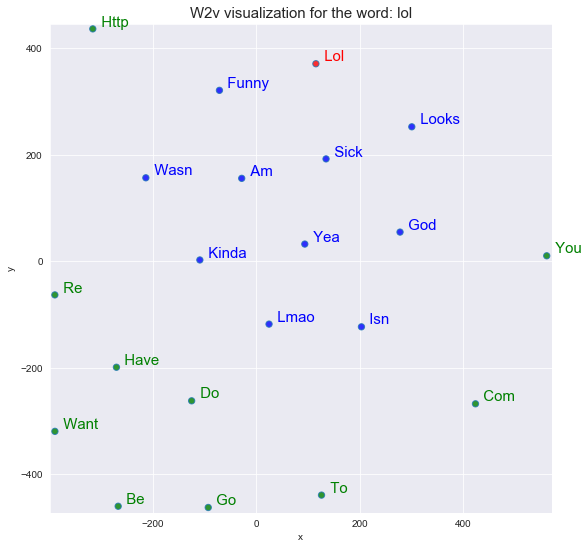

In [0]:
plot_w2v(modelTest, 'lol', get_words('lol'))

In [0]:
word_model = gensim.models.Word2Vec(sentences, size=100, min_count=1, 

                                    window=5, iter=100)

In [0]:
pretrained_weights = word_model.wv.syn0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [0]:
len(pretrained_weights)

31769

# LSTM

In [0]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

In [0]:
def clean_text(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

In [0]:
b = test.content[:20000]

In [0]:
type(b)

pandas.core.series.Series

In [0]:
text = ' '.join(b)

In [0]:
# x = []
# for word in b:
#     x.append(word)

In [0]:
# text = ''.join(test['content'])

In [0]:
type(text)

str

In [0]:
# text = ' '.join(x)

In [0]:
text = clean_text(text)

In [0]:
type(text)

str

In [0]:
len(text)

1329141

In [0]:
with open('./cyberTrolls.json', 'r') as f:
    text = f.read()

In [0]:
encodedVecs = np.array([modelTest[ch] for ch in text])

In [0]:
chars = tuple(set(text))

int2char = dict(enumerate(chars))

char2int = {ch: ii for ii, ch in int2char.items()}

encoded = np.array([char2int[ch] for ch in text])

In [0]:
len(chars)

96

In [0]:
def one_hot_encode(arr, n_labels):
    
    # Initialize the the encoded array
    one_hot = np.zeros((np.multiply(*arr.shape), n_labels), dtype=np.float32)
    
    # Fill the appropriate elements with ones
    one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1.
    
    # Finally reshape it to get back to the original array
    one_hot = one_hot.reshape((*arr.shape, n_labels))
    
    return one_hot

In [0]:
def get_batches(arr, n_seqs, n_steps):
    '''Create a generator that returns batches of size
       n_seqs x n_steps from arr.
       
       Arguments
       ---------
       arr: Array you want to make batches from
       n_seqs: Batch size, the number of sequences per batch
       n_steps: Number of sequence steps per batch
    '''
    
    batch_size = n_seqs * n_steps
    n_batches = len(arr)//batch_size
    
    # Keep only enough characters to make full batches
    arr = arr[:n_batches * batch_size]
    
    # Reshape into n_seqs rows
    arr = arr.reshape((n_seqs, -1))
    
    for n in range(0, arr.shape[1], n_steps):
        
        # The features
        x = arr[:, n:n+n_steps]
        
        # The targets, shifted by one
        y = np.zeros_like(x)
        
        try:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+n_steps]
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
        yield x, y

In [0]:
batches = get_batches(encoded, 10, 50)
x, y = next(batches)

In [0]:
print('x\n', x[:10, :10])
print('\ny\n', y[:10, :10])

x
 [[76 23 87  0 ...  1 32 81 23]
 [21  0 33 43 ... 43 33 49 81]
 [94 53 33 81 ...  1 43 33 21]
 [32 23 24 76 ...  0 81  1 43]
 ...
 [35  0  5 33 ... 10  1 33 82]
 [24 15 23 12 ... 48 37 23  1]
 [ 0  5 33 62 ... 55 33 53 33]
 [49 32 16 33 ... 26  1 33 14]]

y
 [[23 87  0 32 ... 32 81 23 24]
 [ 0 33 43 14 ... 33 49 81 33]
 [53 33 81 49 ... 43 33 21 81]
 [23 24 76 23 ... 81  1 43 23]
 ...
 [ 0  5 33 16 ...  1 33 82  1]
 [15 23 12 23 ... 37 23  1 79]
 [ 5 33 62  0 ... 33 53 33 30]
 [32 16 33 82 ...  1 33 14 32]]


In [0]:
class CharRNN(nn.Module):
    
    def __init__(self, tokens, n_steps=100, n_hidden=256, n_layers=2,
                               drop_prob=0.5, lr=0.001):
        super().__init__()
        self.drop_prob = drop_prob
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.lr = lr
        
        # Creating character dictionaries
        self.chars = tokens
        self.int2char = dict(enumerate(self.chars))
        self.char2int = {ch: ii for ii, ch in self.int2char.items()}
        
        ## Define the LSTM
        self.lstm = nn.LSTM(len(self.chars), n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        ## Define a dropout layer
        self.dropout = nn.Dropout(drop_prob)
        
        ## Define the final, fully-connected output layer
        self.fc = nn.Linear(n_hidden, len(self.chars))
        
        # Initialize the weights
        self.init_weights()
      
    
    def forward(self, x, hc):
        ''' Forward pass through the network. 
            These inputs are x, and the hidden/cell state `hc`. '''
        
        ## Get x, and the new hidden state (h, c) from the lstm
        x, (h, c) = self.lstm(x, hc)
        
        ## Ppass x through the dropout layer
        x = self.dropout(x)
        
        # Stack up LSTM outputs using view
        x = x.view(x.size()[0]*x.size()[1], self.n_hidden)
        
        ## Put x through the fully-connected layer
        x = self.fc(x)
        
        # Return x and the hidden state (h, c)
        return x, (h, c)
    
    
    def predict(self, char, h=None, top_k=None):
        ''' Given a character, predict the next character.
        
            Returns the predicted character and the hidden state.
        '''
#         if cuda:
#             self.cuda()
#         else:
#             self.cpu()
        
        if h is None:
            h = self.init_hidden(1)
        
        x = np.array([[self.char2int[char]]])
        x = one_hot_encode(x, len(self.chars))
        
        inputs = torch.from_numpy(x)
        
#         if cuda:
#             inputs = inputs.cuda()
        
        h = tuple([each.data for each in h])
        out, h = self.forward(inputs, h)

        p = F.softmax(out, dim=1).data
        
#         if cuda:
#             p = p.cpu()
        
        if top_k is None:
            top_ch = np.arange(len(self.chars))
        else:
            p, top_ch = p.topk(top_k)
            top_ch = top_ch.numpy().squeeze()
        
        p = p.numpy().squeeze()
        
        char = np.random.choice(top_ch, p=p/p.sum())
            
        return self.int2char[char], h
    
    def init_weights(self):
        ''' Initialize weights for fully connected layer '''
        initrange = 0.1
        
        # Set bias tensor to all zeros
        self.fc.bias.data.fill_(0)
        # FC weights as random uniform
        self.fc.weight.data.uniform_(-1, 1)
        
    def init_hidden(self, n_seqs):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x n_seqs x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        return (weight.new(self.n_layers, n_seqs, self.n_hidden).zero_(),
                weight.new(self.n_layers, n_seqs, self.n_hidden).zero_())

In [0]:
def train(net, data, epochs=10, n_seqs=10, n_steps=50, lr=0.001, clip=5, val_frac=0.1, print_every=10):
    ''' Training a network 
    
        Arguments
        ---------
        
        net: CharRNN network
        data: text data to train the network
        epochs: Number of epochs to train
        n_seqs: Number of mini-sequences per mini-batch, aka batch size
        n_steps: Number of character steps per mini-batch
        lr: learning rate
        clip: gradient clipping
        val_frac: Fraction of data to hold out for validation
        cuda: Train with CUDA on a GPU
        print_every: Number of steps for printing training and validation loss
    
    '''
    
    net.train()
    
    opt = torch.optim.Adam(net.parameters(), lr=lr)
    
    criterion = nn.CrossEntropyLoss()
    
    # create training and validation data
    val_idx = int(len(data)*(1-val_frac))
    data, val_data = data[:val_idx], data[val_idx:]
    
#     if cuda:
#         net.cuda()
    
    counter = 0
    n_chars = len(net.chars)
    
    for e in range(epochs):
        
        h = net.init_hidden(n_seqs)
        
        for x, y in get_batches(data, n_seqs, n_steps):
            
            counter += 1
            
            # One-hot encode our data and make them Torch tensors
            x = one_hot_encode(x, n_chars)
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            
#             if cuda:
#                 inputs, targets = inputs.cuda(), targets.cuda()

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            h = tuple([each.data for each in h])

            net.zero_grad()
            
            output, h = net.forward(inputs, h)
            
            loss = criterion(output, targets.view(n_seqs*n_steps))

            loss.backward()
            
            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)

            opt.step()
            
            if counter % print_every == 0:
                
                # Get validation loss
                val_h = net.init_hidden(n_seqs)
                val_losses = []
                
                for x, y in get_batches(val_data, n_seqs, n_steps):
                    
                    # One-hot encode our data and make them Torch tensors
                    x = one_hot_encode(x, n_chars)
                    x, y = torch.from_numpy(x), torch.from_numpy(y)
                    
                    # Creating new variables for the hidden state, otherwise
                    # we'd backprop through the entire training history
                    val_h = tuple([each.data for each in val_h])
                    
                    inputs, targets = x, y
#                     if cuda:
#                         inputs, targets = inputs.cuda(), targets.cuda()

                    output, val_h = net.forward(inputs, val_h)
                    val_loss = criterion(output, targets.view(n_seqs*n_steps))
                
                    val_losses.append(val_loss.item())
                
                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.4f}...".format(loss.item()),
                      "Val Loss: {:.4f}".format(np.mean(val_losses)))

In [0]:
net = CharRNN(chars, n_hidden=512, n_layers=2)

print(net)

CharRNN(
  (lstm): LSTM(96, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=512, out_features=96, bias=True)
)


In [0]:
n_seqs, n_steps = 128, 100

%time train(net, encoded, epochs=1, n_seqs=n_seqs, n_steps=n_steps, lr=0.001, print_every=10)

Epoch: 1/1... Step: 10... Loss: 3.3719... Val Loss: 3.2991
Epoch: 1/1... Step: 20... Loss: 3.0987... Val Loss: 2.9858
Epoch: 1/1... Step: 30... Loss: 2.7053... Val Loss: 2.5489
Epoch: 1/1... Step: 40... Loss: 2.4710... Val Loss: 2.2069
Epoch: 1/1... Step: 50... Loss: 2.1148... Val Loss: 1.8845
Epoch: 1/1... Step: 60... Loss: 1.9298... Val Loss: 1.6687
Epoch: 1/1... Step: 70... Loss: 1.6378... Val Loss: 1.4558
Epoch: 1/1... Step: 80... Loss: 1.6624... Val Loss: 1.3879
Epoch: 1/1... Step: 90... Loss: 1.5913... Val Loss: 1.3215
Epoch: 1/1... Step: 100... Loss: 1.4231... Val Loss: 1.2900
Epoch: 1/1... Step: 110... Loss: 1.4378... Val Loss: 1.2737
Epoch: 1/1... Step: 120... Loss: 1.4711... Val Loss: 1.2553
Epoch: 1/1... Step: 130... Loss: 1.5632... Val Loss: 1.2335
Epoch: 1/1... Step: 140... Loss: 1.4176... Val Loss: 1.2182
Epoch: 1/1... Step: 150... Loss: 1.3976... Val Loss: 1.2141
Epoch: 1/1... Step: 160... Loss: 1.4749... Val Loss: 1.2035
Epoch: 1/1... Step: 170... Loss: 1.4397... Val Lo

In [0]:
def sample(net, size, prime='The', top_k=None):
        
#     if cuda:
#         net.cuda()
#     else:
#         net.cpu()

    net.eval()
    
    # First off, run through the prime characters
    chars = [ch for ch in prime]
    
    h = net.init_hidden(1)
    
    for ch in prime:
        char, h = net.predict(ch, h, top_k=top_k)

    chars.append(char)
    
    # Now pass in the previous character and get a new one
    for ii in range(size):
        
        char, h = net.predict(chars[-1], h, top_k=top_k)
        chars.append(char)

    return ''.join(chars)

In [0]:
print(sample(net, 2000, prime='Anna', top_k=5))

Annat you hint han ting ther a s o tore ton dime tous in  wertil that shan thoth. he wot he wan the tho ge that her an d merite so for whon  as th wh te whe tes te a so fu dond mesess so so fu thatho got ime to hat hhe ate tin sothe thine  amento wise sou to s te son worte sor sot ton tes ary aralde ant in adore so the thot  he whit s ithe the dick sou lass the was a do ma lile sha s ale thon tous sothes an suring. in gangi there sas thore ars. is in dat ham there sase ing. whime he shit he hate ha t o ase the to her as ithas sot his he tis tho gh the th ame the dames. thame thang as setr ine soust oul s ou tou d on d atin the tist heat the s ime ar in tarelas yon wo lathat hath wate tind..... I whan dick s im  ate as as tha s tont tele dithe ses an dicknon that tome soull yous the t int. inges sor and as the teon d ot hat histe the whas ing.","annotation":{"notes":"","label":{"nones t to s int ist it thes se ass tom amn as so setre l ore ite he wete so tind the dicks s ase ate tarel y

# W2V Fastai

In [0]:
train.head()

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [0]:
data = TextClasDataBunch.from_df('.', train, train)
data.show_batch()

text,target
xxbos 0,Damn the consequences.
xxbos 1,great :P that lady is a cunt that serves me right for getting excited over something
xxbos 0,chicken salad :]
xxbos 1,omg that so fucking sucks
xxbos 0,its not just that Corinne is a bitch she's proud of herself being a bitch and happy that people boo her - what a psycho


In [0]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '0']

In [0]:
data.train_ds[0][0]

Text xxbos 1

In [0]:
data.train_ds[0][0].data[:10]

array([ 2, 10])

In [0]:
data.train_ds

LabelList (20001 items)
x: TextList
xxbos 1,xxbos 1,xxbos 1,xxbos 1,xxbos 1
y: CategoryList
 Get fucking real dude., She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like  ..., why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here., Dude they dont finish enclosing the fucking showers. I hate half assed jobs. Whats the reasononing behind it? Makes no sense., WTF are you talking about Men? No men thats not a menage  that's just gay.
Path: .

In [0]:
train.columns

Index(['content', 'annotation'], dtype='object')

In [0]:
data_lm = (TextList.from_df(train, path='.', cols=0)            
            .split_by_rand_pct(0.2)
            .label_for_lm()           
            .databunch(bs=bs))

In [0]:
bs = 48

In [0]:
data_lm.show_batch()

idx,text
0,later to sched writing a book here . xxbos xxmaj dude they do nt finish enclosing the fucking showers . i hate half assed jobs . xxmaj what s the reasononing behind it ? xxmaj makes no sense . xxbos xxup wtf are you talking about xxmaj men ? xxmaj no men that s not a xxunk that 's just gay . xxbos xxmaj ill save you the trouble sister
1,xxmaj xxunk ! ! xxbos xxmaj agreed ! xxmaj twitter showed the way with the whale ;) xxbos xxmaj xxunk shopping is n't what sucks ! xxmaj it 's the crowds that cause the trouble . haha ! xxmaj love your website btw ! ! xxbos xxup fuck xxup yeah xxup bioshock ! xxmaj tell me how the apartment hunt goes ! xxbos xxmaj merry xxmaj christmas to you too
2,xxup yeah xxup ryan xxup ross . il his lyrics way more than wbeckett 's tbh i donut care if they make no sense . xxup btw rolling stone xxup fails . xxbos fuck u asshole we ai nt even watchin the game shyt we slda goten closer so i cn c betr.how r those cheerleaders 4 ya xxbos ud lyk it if they suxd ur dick.bt i d kill
3,xxbos i wanna butt fuck you . xxmaj cuz i m a horny gremlin xxbos xxmaj keep your damn hands off my @jgarber . xxmaj we claimed him first ! xxbos i 'm going to watch him kick xxmaj count xxmaj adamar 's ass and then it 's off to feed the beast . xxbos xxmaj way to be a dick . xxbos i 'm giving you fair warning to
4,i hate most of what 's on the radio so it 's not really for me . xxbos i have both now . iphone camera sucks as well as lack of other things but email twitter and apps are good . xxmaj big screen is nice . xxbos you can do video after jailbreak . xxmaj but still it 's not a patch on the n95 camera . i really


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
# %time learn.lr_find()

In [0]:
# learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-15, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.063670,5.817030,0.145860,03:30


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.686800,4.324479,0.246794,09:58


In [0]:
TEXT = "This is really great"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

This is really great to stay with me and even the getting out of the mess is meant to be fun . xxbos It was a great joke . But i did 9 as i was a lot of anyway .
This is really great . That 's fucking damn good . You were the only one who did . You could get a new house . xxbos You know where you know ! Why do you see the amount
